<a href="https://colab.research.google.com/github/katherymbr/Mamografias1/blob/main/3_Blobs_copia_de_proyecto_final_fractales6_1_fito3_dcm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO DE MAMOGRAFIAS CON MICROCALCIFICACIONES - Métodos fractales

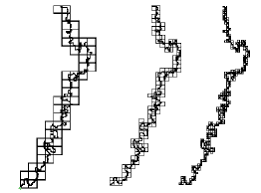

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*    *Microcalcificaciones*







Las microcalcificaciones son depósitos de oxalato cálcico y fosfato cálcico en el tejido mamario que aparecen como manchas blancas en una mamografía. Los mecanismos por los que se producen las microcalcificaciones no se conocen con claridad, aunque se sospecha que intervienen muchos factores, como la edad, los desequilibrios hormonales, el embarazo, la lactancia y los cambios en la dieta (https://www.nature.com/articles/s41598-019-51186-w)

Los depósitos de calcificación se encuentran en el sistema ductal, los acinos mamarios, el estroma y los vasos. Las microcalcificaciones están presentes en aproximadamente el 55% de las neoplasias mamarias no palpables y son responsables de la detección del 85-95% de los casos de carcinoma ductal in situ (CDIS) mediante mamografía , y también pueden estar presentes en cánceres invasivos. El papel de las microcalcificaciones en la detección del cáncer de mama ha sido ampliamente estudiado y algunos grupos de investigación incluso han investigado el papel de las microcalcificaciones en términos de riesgo y progresión del cáncer de mama.

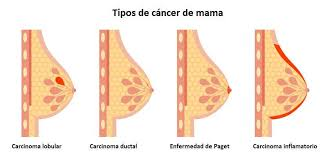

*     *Hipotesis*

La población de pixeles en la region de microcalcificacion tiene una distribución donde la media tiene una dimensión fractal más alta que la población de pixeles fuera de la microcalcificación (la población de pixeles que esta en las microcalcificaciones tiene una dimnesión fractal que esta por encima de la dimensión fractal de la media). En terminos de frecuencia, en los puntos donde hay microcalcificaciones hay alta frecuencia.

*     *Dataset*

Base de datos mini-MIAS de mamografías (http://peipa.essex.ac.uk/info/mias.html) .La base de datos mini-MIAS consiste en una colección normalizada de 322 imágenes de mamografías (en blanco y negro), 161 derechas y 161 de izquierda de 1024 × 1024 píxeles.


**1ra columna:**
Número de referencia de la base de datos MIAS.

**2da columna:**
Carácter del tejido de fondo:
  F Graso
  G Graso-glandular
  D densa-glandular

**3ra columna:**
Clase de anormalidad presente:
  CALC Calcificación
  CIRC Masas bien definidas/circunscritas
  SPIC Masas espiculadas
  MISC Otras masas mal definidas
  ARCO Distorsión arquitectónica
  Asimetría ASYM
  NORMA Normal

**4ta columna:**
Gravedad de la anormalidad;
  B Benigno
  M maligno
  
**5ª, 6ª columnas:**
coordenadas de imagen x,y del centro de la anormalidad.
7ma columna:
Radio aproximado (en píxeles) de un círculo que encierra la anomalía.

# FUNCIONES

In [ ]:
pip install pydicom

In [ ]:
import imageio as io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from skimage import data
from skimage.filters import threshold_multiotsu
import matplotlib
from pydicom import dcmread

In [ ]:
# LEER IMAGEN
def leer_imagen(rute):
  imagen= io.imread(rute)
  return(imagen)

ruta='/content/drive/MyDrive/'

In [ ]:
# LEER IMAGEN
def leer_imagen(rute):
  imagen= io.imread(rute)
  return(imagen)

ruta='/content/drive/MyDrive/'


In [ ]:
# TAMAÑO DE LA IMAGEN Y EL PIXEL MÁXIMO Y MÍNIMO

def tamaño_imagen(imagen):
    print('dimensiones de la imagen', imagen.shape)
    print ('valor minimo del pixel:',imagen.min())
    print('valor máximo del pixel:', imagen.max())

In [ ]:
# GRAFICAR UNA IMAGEN CON TÍTULO

def graficar_imagen(imagen, titulo, tamaño=100):
    fig, ax = plt.subplots(dpi=tamaño)
    ax.imshow(imagen,cmap='gray')
    plt.title(str(titulo))
    plt.show

In [ ]:
# GRAFICAR 2 IMAGENES HORIZONTALES CON TÍTULO

def graficar_dosimagenes_horizontaltitulo(imagen_oscura, imagen_brillante, titulo1, titulo2, tamaño=100):
    fig, ax = plt.subplots(1,2, dpi=tamaño)
    ax[0].imshow(imagen_oscura, cmap='gray')  # DEBE SER LA IMAGEN DELA PADING, NO LA IMAGEN
    ax[0].set_axis_off()
    plt.title(str(titulo1))
    ax[1].imshow(imagen_brillante, cmap='gray')
    ax[1].set_axis_off()
    plt.title(str(titulo2))
    plt.show()

In [ ]:
#  GRAFICAR 3 IMAGENES HORIZONTAL + TÍTULO

def graficar_tresimagenes_horizontaltitulo(imagen_oscura, imagen_brillante, imagen1, titulo1, titulo2, titulo3, tamaño=400):
    fig, ax = plt.subplots(1,3, dpi=tamaño)
    ax[0].imshow(imagen_oscura, cmap='gray')
    ax[0].set_axis_off()
    ax[0].set_title(str(titulo1), fontsize=5)
    #plt.title(str(titulo1))
    ax[1].imshow(imagen_brillante, cmap='gray')
    ax[1].set_axis_off()
    ax[1].set_title(str(titulo2), fontsize=5)
    #plt.title(str(titulo2))
    ax[2].imshow(imagen1, cmap='gray')
    ax[2].set_axis_off()
    ax[2].set_title(str(titulo3), fontsize=5)
    plt.show()

In [ ]:
#  GRAFICAR 4 IMAGENES HORIZONTAL + TÍTULO

def graficar_cuatroimagenes_horizontaltitulo(imagen1,imagen2,imagen3,imagen4,titulo1,titulo2,titulo3,titulo4):

    # create figure
    fig = plt.figure(figsize=(24, 26))
    # setting values to rows and column variables
    rows = 1
    columns = 4
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)
    # showing image
    plt.imshow(imagen1, cmap="gray")
    plt.axis('off')
    plt.title(str(titulo1))
    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)
    # showing image
    plt.imshow(imagen2, cmap="gray")
    plt.axis('off')
    plt.title(str(titulo2))
    # Adds a subplot at the 3rd position
    fig.add_subplot(rows, columns, 3)
    # showing image
    plt.imshow(imagen3, cmap="gray")
    plt.axis('off')
    plt.title(str(titulo3))
    # Adds a subplot at the 4th position
    fig.add_subplot(rows, columns, 4)
    # showing image
    plt.imshow(imagen4, cmap="gray")
    plt.axis('off')
    plt.title(str(titulo4))

In [ ]:
def area_afectada(img5, x,y,r):

    img5_copy=np.copy(img5)
    #cv2.line(imagen264_v2,(x1,y1),(x2,y2),(255,0,0),4)
    cv2.line(img5_copy,(x-r,y-r),(x+r,y-r),(255,0,0),4)
    cv2.line(img5_copy,(x-r,y+r),(x+r,y+r),(255,0,0),4)
    cv2.line(img5_copy,(x-r,y-r),(x-r,y+r),(255,0,0),4)
    cv2.line(img5_copy,(x+r,y-r),(x+r,y+r),(255,0,0),4)
    return(img5_copy)

In [ ]:
# CORTAR UNA IMAGEN

def imagen_recorte(imagen,x,y,r):
    imagen_recorte= imagen[y-r:y+r , x-r:x+r]
    #graficar_imagen(imagen_recorte , 'imagen recortada', tamaño=90)
    return(imagen_recorte)

In [ ]:
#  GRAFICAR 10 IMÁGENES

def graficar_diezimagenes_horizontaltitulo(img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10):

    # create figure
    fig = plt.figure(figsize=(24, 26))
    # setting values to rows and column variables
    rows = 5
    columns = 2
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)
    # showing image
    plt.imshow(img1, cmap="gray")
    plt.axis('off')
    plt.title(str(t1))
    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)
    # showing image
    plt.imshow(img2, cmap="gray")
    plt.axis('off')
    plt.title(str(t2))
    # Adds a subplot at the 3rd position
    fig.add_subplot(rows, columns, 3)
    # showing image
    plt.imshow(img3, cmap="gray")
    plt.axis('off')
    plt.title(str(t3))
    # Adds a subplot at the 4th position
    fig.add_subplot(rows, columns, 4)
    # showing image
    plt.imshow(img4, cmap="gray")
    plt.axis('off')
    plt.title(str(t4))

    fig.add_subplot(rows, columns, 5)

    plt.imshow(img5, cmap="gray")
    plt.axis('off')
    plt.title(str(t5))

    fig.add_subplot(rows, columns, 6)

    plt.imshow(img6, cmap="gray")
    plt.axis('off')
    plt.title(str(t6))

    fig.add_subplot(rows, columns, 7)

    plt.imshow(img7, cmap="gray")
    plt.axis('off')
    plt.title(str(t7))

    fig.add_subplot(rows, columns, 8)

    plt.imshow(img8, cmap="gray")
    plt.axis('off')
    plt.title(str(t8))

    fig.add_subplot(rows, columns, 9)

    plt.imshow(img9, cmap="gray")
    plt.axis('off')
    plt.title(str(t9))

    fig.add_subplot(rows, columns, 10)

    plt.imshow(img10, cmap="gray")
    plt.axis('off')
    plt.title(str(t10))



# funciones de pre_procesamiento

In [ ]:
#PASAR LA  IMAGEN AL ESPACIO Y EN GRIS


import numpy as np

def rgb_a_y(matriz_rgb):
    #La función rgb_a_y toma la matriz matriz_rgb que contiene los valores RGB de cada píxel de la imagen
    matriz_rgb = np.array(matriz_rgb) #la matriz RGB se convierte en un arreglo de NumPy utilizando np.array para permitir operaciones vectorizadas.
    coeficientes = np.array([0.299, 0.587, 0.114]) #se define un arreglo coeficientes que contiene los coeficientes de conversión de RGB a Y.
    matriz_y = np.dot(matriz_rgb, coeficientes) #La matriz RGB se multiplica con los coeficientes utilizando np.dot para calcular la suma ponderada de los canales de color. Esto genera una matriz de luminancia matriz_y
    return matriz_y



In [ ]:
# FUNCION _TRANSFORMACIÓN LOGARÍTMICA

def transf_log(img):
  img_log= (255/np.log(256))*np.log(img+1.1)

  return(img_log)

In [ ]:
# FUNCIÓN DE TRANSFORMACIÓN DE ANSCOMBE

def anscombe(img):
  img_anscombe= 2.0*np.sqrt(img + 3.0/8.0)
  print("Ajustar el rango según el tamaño del pixel max y min de la imágen!!!:")
  tamaño_imagen(img_anscombe)

  return(img_anscombe)


In [ ]:
# FUNCION TRIPLE UMBRAL DE OTSU


def triple_umbral_otsu(img_log):

  # Setting the font size for all plots.
  matplotlib.rcParams['font.size'] = 9

  # The input image.
  image = img_log

  # Applying multi-Otsu threshold for the default value, generating
  # three classes.
  thresholds = threshold_multiotsu(image)

  # Using the threshold values, we generate the three regions.
  regions = np.digitize(image, bins=thresholds)

  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

  # Plotting the original image.
  ax[0].imshow(image, cmap='gray')
  ax[0].set_title('img_T_log')
  ax[0].axis('off')

  # Plotting the histogram and the two thresholds obtained from
  # multi-Otsu.
  ax[1].hist(image.ravel(), bins=255)
  ax[1].set_title('Histogram')
  for thresh in thresholds:
      ax[1].axvline(thresh, color='r')

  # Plotting the Multi Otsu result.
  ax[2].imshow(regions, cmap='jet')
  ax[2].set_title('Multi-Otsu result')
  ax[2].axis('off')

  plt.subplots_adjust()

  print("El triple umbral  de OTSU es (Nota! empieza en 0 - hasta  255)= ",thresholds)
  print("El triple umbral  de OTSU se visulaiza con la paleta JET (0=azul , 1=verde , 2=rojo) ")

  plt.show()


In [ ]:
# FUNCIÓN FILTRO DE APERTURA

def filto_apertura(img):
  img_otsu_apertura=img.astype(np.uint8)
  # defino el kernel y su tamaño
  kernel1 = np.ones((5,5),np.uint8)
  #aplico el filtro de apertura y defino las veces que voy a aplicar este filtro (iteraciones)
  opening = cv2.morphologyEx(img_otsu_apertura, cv2.MORPH_OPEN, kernel1)

  return(opening)

In [ ]:
# FUNCION DE INTENSIDAD MENDIANTE FUNCIÓN COSENO

def funcion_intesidad_coseno(img):
  img_coseno= 1-np.cos((np.pi/2)*(img/255.0))
  #vmin = 0.0162 # Valor mínimo deseado
 # vmax = 0.0193 # Valor máximo deseado
  print("Ajustar el rango según el tamaño del pixel max y min de la imágen!!!:")
  tamaño_imagen(img_coseno)
  #print("el valor minimo del ranjo ajustado vmax es:", vmax)

  return(img_coseno)


In [ ]:
# FUNCIÓN FILTRO DOG (DIFERENCIA DE GAUSS)

def filtro_dog(img, k1,k2):

  dog_low = cv2.GaussianBlur(img, (3,3), 0)
  dog_higth = cv2.GaussianBlur(img, (5,5), 0)
  dog =  k1*dog_low  - k2*dog_higth

  return(dog)

# EJECUCIÓN




*     *1. Preprocesamiento*

Para el pre-procesamiento de la imagen se realizarán los pasos desarrollados a continuación:

In [ ]:
# INFORMACIÓN DEL DATASET 'MIAS'

#mg_df =pd.read_table('/content/drive/MyDrive/Info.txt', sep=" " )
print('Dataset MIAS')
print('nro, img_MIAS, tejido, anormalidad, gravedad, x, y, c')
#print(mg_df)
#mg_df.head()

Dataset MIAS
nro, img_MIAS, tejido, anormalidad, gravedad, x, y, c


In [ ]:
# FILTRO IMAGENES CON ANOMALIAS (ANOR), MICROCALCIFICCAIONES (CALC) MALIGNAS (M)

#df_calc = mg_df[mg_df['ANOR'] == 'CALC'] #30 con calcificaciones
#df_calc = mg_df[mg_df['G']== 'M']
#df_calc.head(100)


# **Nro.1 . IMAGEN FITO**

Leo la mamografia en rgb

dimensiones de la imagen (1380, 1392, 3)
valor minimo del pixel: 0
valor máximo del pixel: 255


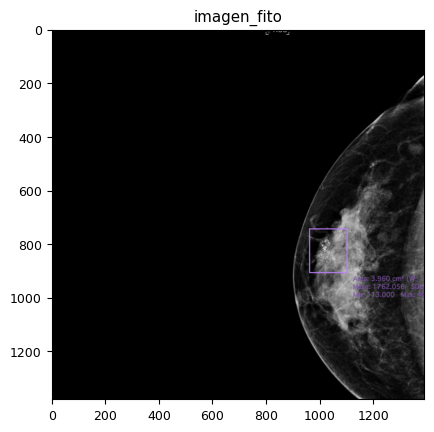

In [ ]:
#LEO LA MAMOGRAFÍA
#imagen209= leer_imagen (ruta+'img_fito1.dcm')
#plt.imshow(imagen209, cmap="gray")
#graficar_imagen(imagen209 , 'imagen_209', tamaño=100)
#tamaño_imagen(imagen209)

imgrgb = dcmread(ruta+'img_fito1.dcm') #leer imagen en formato .dcm
imgrgb = imgrgb.pixel_array #convertir imagen .dcm a Array
graficar_imagen(imgrgb , 'imagen_fito', tamaño=100)
tamaño_imagen(imgrgb)

dimensiones de la imagen (132, 132, 3)
valor minimo del pixel: 0
valor máximo del pixel: 242


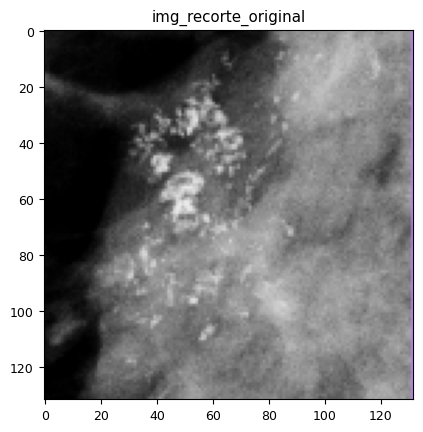

In [ ]:
recorte_209_rgb=imagen_recorte(imgrgb,  1034, 825, 66)
graficar_imagen(recorte_209_rgb, 'img_recorte_original', tamaño=100)
tamaño_imagen(recorte_209_rgb)

Ahora paso al espacio Y, para volver la imagen gris}

dimensiones de la imagen (1380, 1392)
valor minimo del pixel: 0.0
valor máximo del pixel: 238.99999999999997


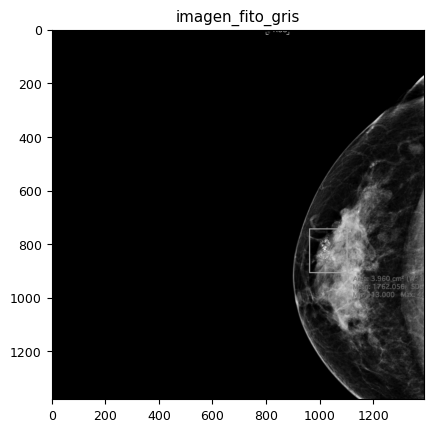

In [ ]:
# paso a y gris
imagen209= rgb_a_y(imgrgb)
graficar_imagen(imagen209, 'imagen_fito_gris', tamaño=100)
tamaño_imagen(imagen209)

(132, 132)

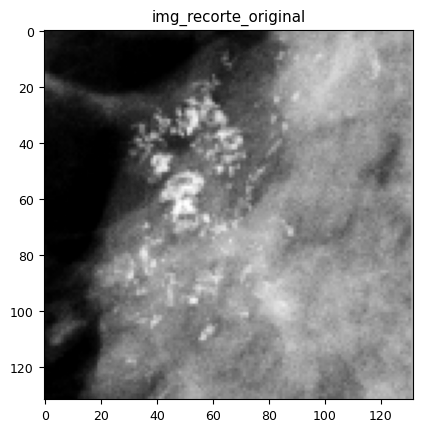

In [ ]:
# Recorto la imagen considerando las coordenadas donde se encuentran las microcalcificaciones

recorte_209_org=imagen_recorte(imagen209,  1034, 825, 66)
graficar_imagen(recorte_209_org, 'img_recorte_original', tamaño=100)
recorte_209_org.shape

# A). SEPARO EL SENO DEL FONDO DE LA IMAGEN:  limpieza de la imagen

## 1.1. Transformación Logaritmica

Para segmentar el perfil del seno, primero se necesitaba mejorar el contraste de la imagen para iluminar los píxeles de baja intensidad cerca de la línea de la piel. Esto se logró mediante una transformación logarítmica de la imagen

dimensiones de la imagen (1380, 1392)
valor minimo del pixel: 4.382924819529179
valor máximo del pixel: 252.0512945378098


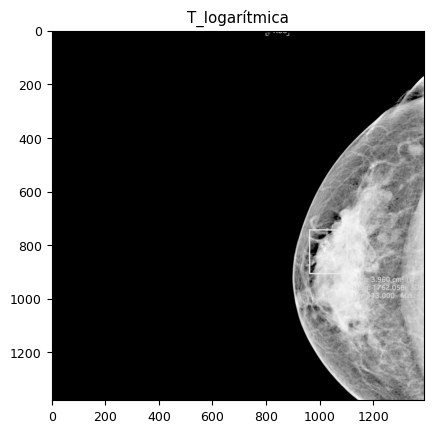

In [ ]:
# Aplico la funcion de transformación logarítmica

img_log=transf_log(imagen209)
graficar_imagen(img_log , 'T_logarítmica', tamaño=100)
tamaño_imagen(img_log)

## 1.2. Triple umbral de OTSU:

 la imagen se segmentó en tres clases según el método de umbral múltiple de Otsu. Se mantuvieron las dos clases más luminosas ya que correspondían a la región mamaria y los demás objetos de la mamografía, mientras que la más oscura correspondía al fondo

El triple umbral  de OTSU es (Nota! empieza en 0 - hasta  255)=  [24.74023437 87.29101562]
El triple umbral  de OTSU se visulaiza con la paleta JET (0=azul , 1=verde , 2=rojo) 


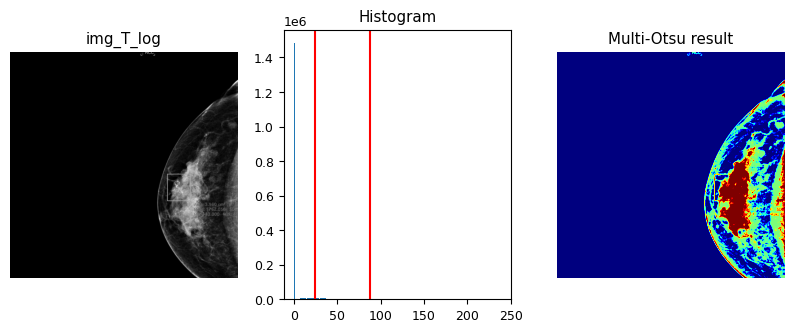

In [ ]:
# APLICO LA FUNCION TRIPLE UMBRAL DE OTSU

triple_umbral_otsu(imagen209)


## 1.2.1. Generacion de la mascara obtenida  en otsu

Con el umbral umbral triple de otsu de tomo el menor umbral para generar la binarizacion o la mascara (0-50.3-160-255, thresholds:50.3)

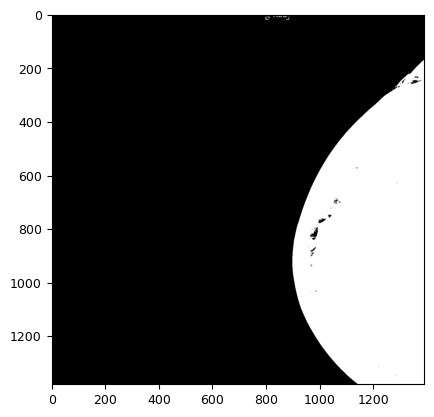

In [ ]:
threshold = 24.74023437

im_log_copy = np.copy(img_log)
mask_1= im_log_copy <= threshold
mask_2 = im_log_copy > threshold

im_log_copy[mask_1] = 0
im_log_copy[mask_2] = 1

plt.imshow(im_log_copy, cmap ='gray')


## 1.2.3. Filtrado morfologico a la mascara de otsu: por apertura

se le realiza el filtrado de apertura a la mascara obtenida en otsu, en esta mascara solo se ve el seno delimitado

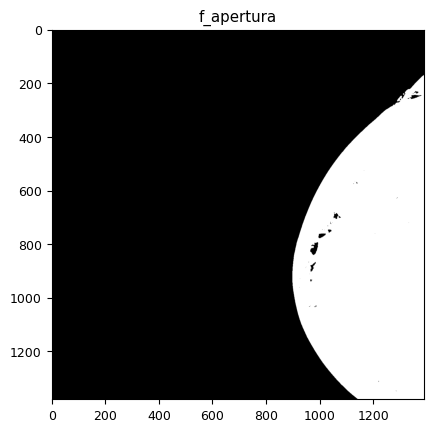

In [ ]:
img_apertura= filto_apertura(im_log_copy)
graficar_imagen(img_apertura , 'f_apertura', tamaño=100)

## 1.3. Convolucion entre la mascara de otsu y la imagen original

<ipython-input-80-6ed4729991d7>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  producto=imagen209.astype(np.float)*img_apertura.astype(np.float)


dimensiones de la imagen (1380, 1392)
valor minimo del pixel: 0.0
valor máximo del pixel: 234.99999999999997


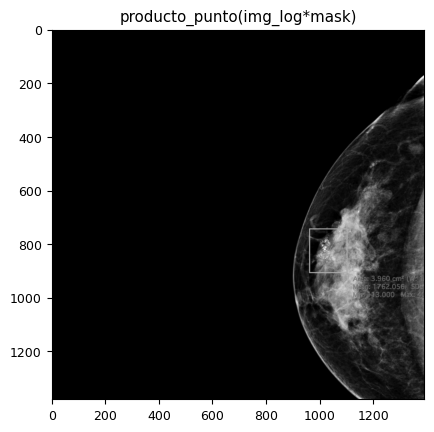

In [ ]:
#PRODUCTO PUNTO ENTRE LA IMAGEN DE LA TRANSF. LOGARITMOCAMASCARA OBTENIDA EN LA BINARIZACIÓN DE OTSU

producto=imagen209.astype(np.float)*img_apertura.astype(np.float)
graficar_imagen(producto , 'producto_punto(img_log*mask)', tamaño=100)
tamaño_imagen(producto)

## 1.4 Limpieza de la mamografia

recorto la imagen, para eliminar la etiqueta que es un elemto que no pertenece a la mamografia, quedando unicamente el fondo (que es negro y contiene pixeles con valor 0) y quedando como imagen el seno

In [ ]:
#Limpieza de la imagen

#img_limpia= producto[:,825:1034]
#graficar_imagen(img_limpia , 'imagen_limpia', tamaño=100)
#tamaño_imagen(img_limpia)

# B). PRE-PROCESAMIENTO DE LA MAMOGRAFIA

En las mamografías digitalizadas, puede ocurrir ruido intrínseco durante el escaneo, debido al polvo y los artefactos presentes en la película o en el escáner. Para reducir este ruido, primero aplicamos la apertura morfológica usando un elemento estructurador de disco de un radio de un píxel

## 2.1.Función de Anscombe

Ajustar el rango según el tamaño del pixel max y min de la imágen!!!:
dimensiones de la imagen (1380, 1392)
valor minimo del pixel: 1.224744871391589
valor máximo del pixel: 30.683871985132512


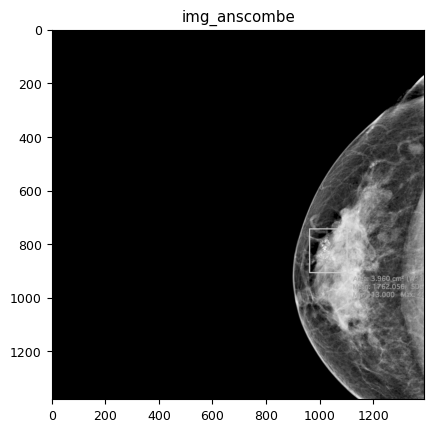

In [ ]:
# APLICO LA FUNCIÓN DE ANSCOMBE

img_anscombe= anscombe(producto)
graficar_imagen(img_anscombe , 'img_anscombe', tamaño=100)
#graficar_dosimagenes_horizontaltitulo(img_limpia_apertura, img_anscombe, "limp_apertura", "anscombe", tamaño=100)

## 2.2.  transformaciones de intensidad mediante la función coseno

Ajustar el rango según el tamaño del pixel max y min de la imágen!!!:
dimensiones de la imagen (1380, 1392)
valor minimo del pixel: 2.8458931914276953e-05
valor máximo del pixel: 0.017809690964170954


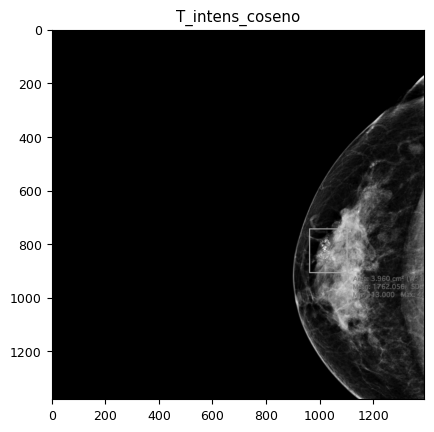

In [ ]:
# APLICO LA FUNCION DE TRANSFORMACIÍN DE INTENSIDAD MEDIANTE FUNCIÓN COSENO

img_coseno= funcion_intesidad_coseno(img_anscombe)
graficar_imagen(img_coseno, 'T_intens_coseno', tamaño=100)
#graficar_dosimagenes_horizontaltitulo( img_limpia,img_coseno, "limpia", "coseno", tamaño=100)

## 2.3. Filtro DOG

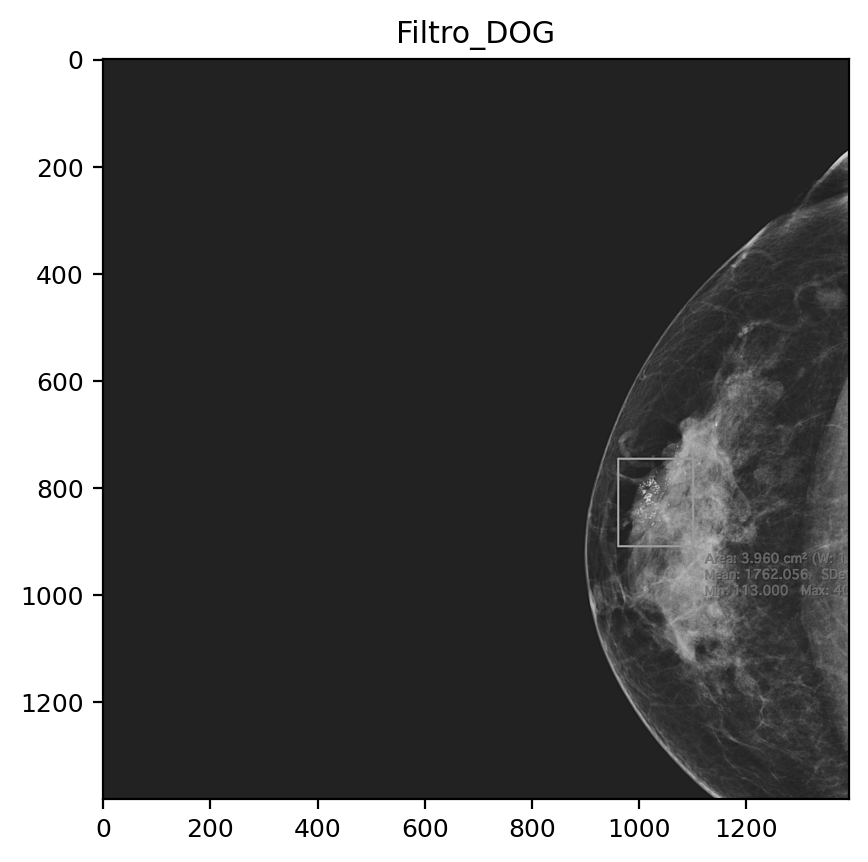

In [ ]:
# APLICO EL FILTRO DOG

img_dog1= filtro_dog(img_coseno, k1=1.1, k2=0.9)
#graficar_imagen(img_dog1, 'img_coseno', tamaño=100)
graficar_imagen(img_dog1, "Filtro_DOG", tamaño=200)

dimensiones de la imagen (132, 132)
valor minimo del pixel: -8.756893554420444e-05
valor máximo del pixel: 0.004189926698745013


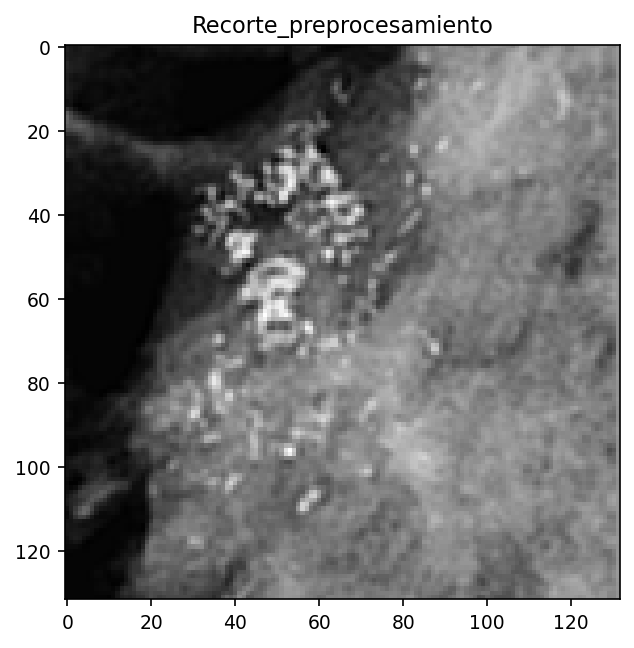

In [ ]:
# Recorto la imagen considerando las coordenadas donde se encuentran las microcalcificaciones

recorte_209_prepro=imagen_recorte(img_dog1,  1034, 825, 66)
graficar_imagen(recorte_209_prepro , 'Recorte_preprocesamiento', tamaño=150)
recorte_209_prepro.shape
tamaño_imagen(recorte_209_prepro)

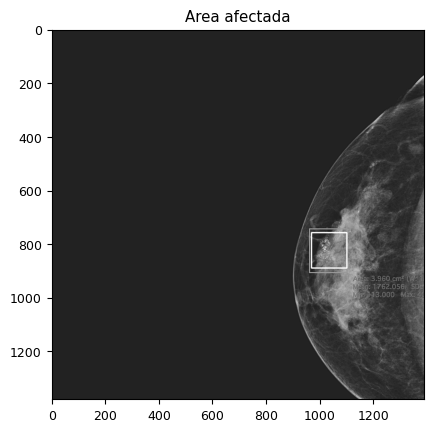

In [ ]:
# APLICO LA FUNCIÓN PARA DIBUJAR EL AREA AFECTADA (x,y,r)

dibujo_area_afectada= area_afectada((img_dog1/img_dog1.max())*255.0, 1034, 825, 66)
graficar_imagen(dibujo_area_afectada, 'Area afectada', tamaño=100)
#graficar_dosimagenes_horizontaltitulo( imagen209, dibujo_area_afectada, "img_209", "pre-proc", tamaño=150)

## 2.4. Recorto la imagen del pre-procesamiento

A la imagen obtenida en el pre-procesamiento le hago el recorte considerando las coordenadas del dataset, donde estan ubicadas las microcalcificaciones (x,y,r)

dimensiones de la imagen (132, 132)
valor minimo del pixel: -8.756893554420444e-05
valor máximo del pixel: 0.004189926698745013


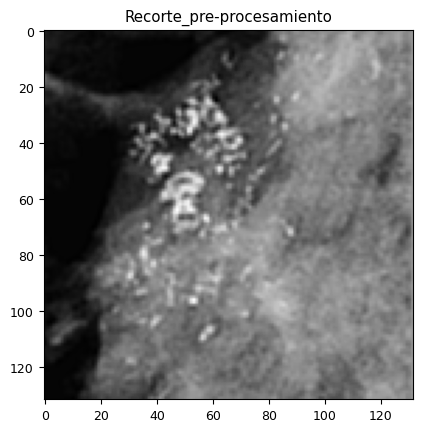

In [ ]:
# Recorto el area afectada

recorte_procesamiento=imagen_recorte(img_dog1, 1034, 825, 66)
graficar_imagen(recorte_procesamiento , 'Recorte_pre-procesamiento', tamaño=100)
tamaño_imagen(recorte_procesamiento)


## 2.5. Comparacion entre recortes de img_original e img_pre-procesada

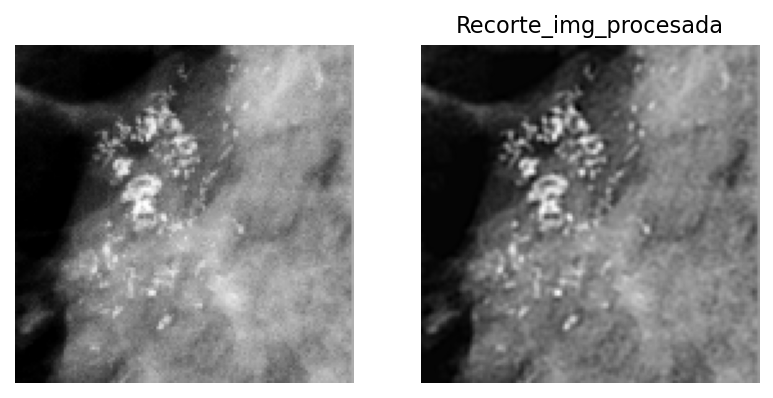

In [ ]:
# comparo los recortes entre la imagen original y la imagen obtenida en el pre-procesamiento

graficar_dosimagenes_horizontaltitulo(recorte_209_org, recorte_procesamiento, "Recorte_img_original", "Recorte_img_procesada", tamaño=150)

# 3.BUSCA DE PARAMETROS

## 3.1. MIN-SIGMA

La desviación estándar mínima para el núcleo gaussiano. Manténgalo bajo para detectar manchas más pequeñas. Las desviaciones estándar del filtro gaussiano se dan para cada eje como una secuencia o como un único número, en cuyo caso es igual para todos los ejes.Valor máximo 1

https://scikit-image.org/docs/stable/api/skimage.feature.html

mejor valor obtenido= 1

Parametros: min_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
0.1
el blob es: 0
el blob es: 1
el blob es: 2


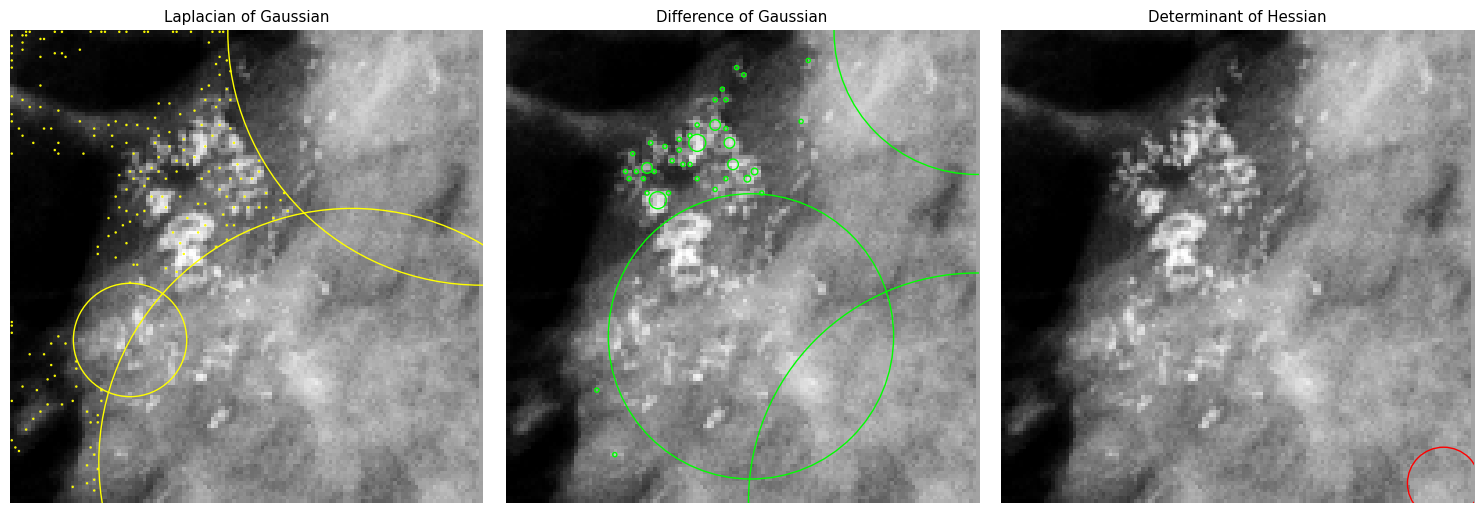

Parametros: min_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
0.2
el blob es: 0
el blob es: 1
el blob es: 2


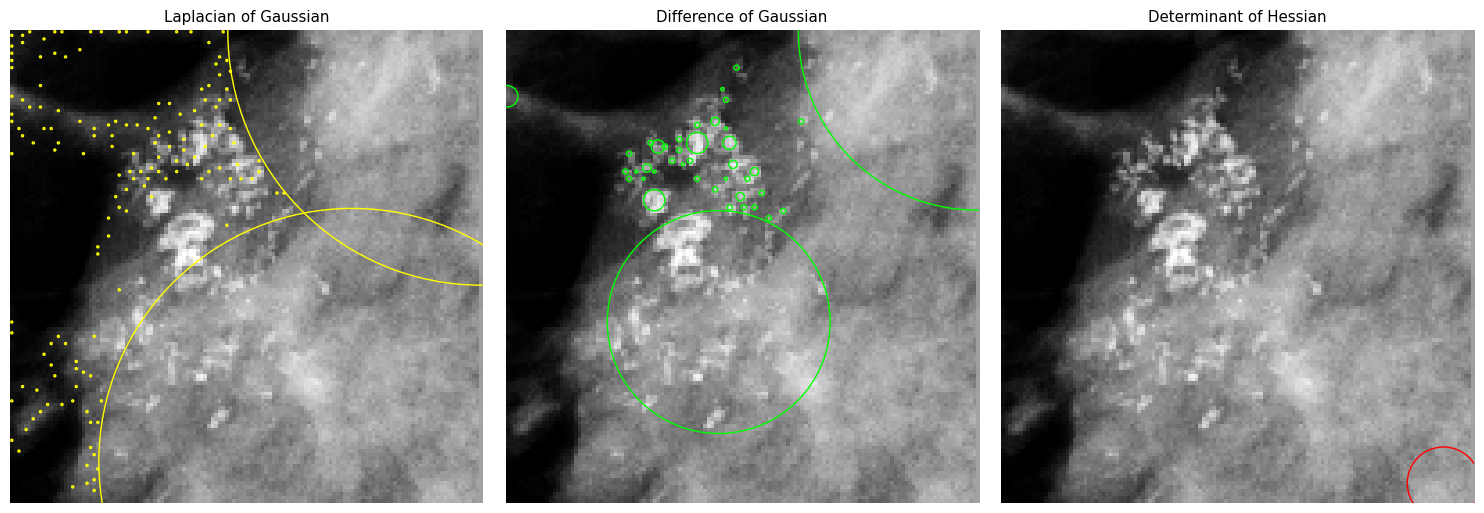

Parametros: min_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
0.4
el blob es: 0
el blob es: 1
el blob es: 2


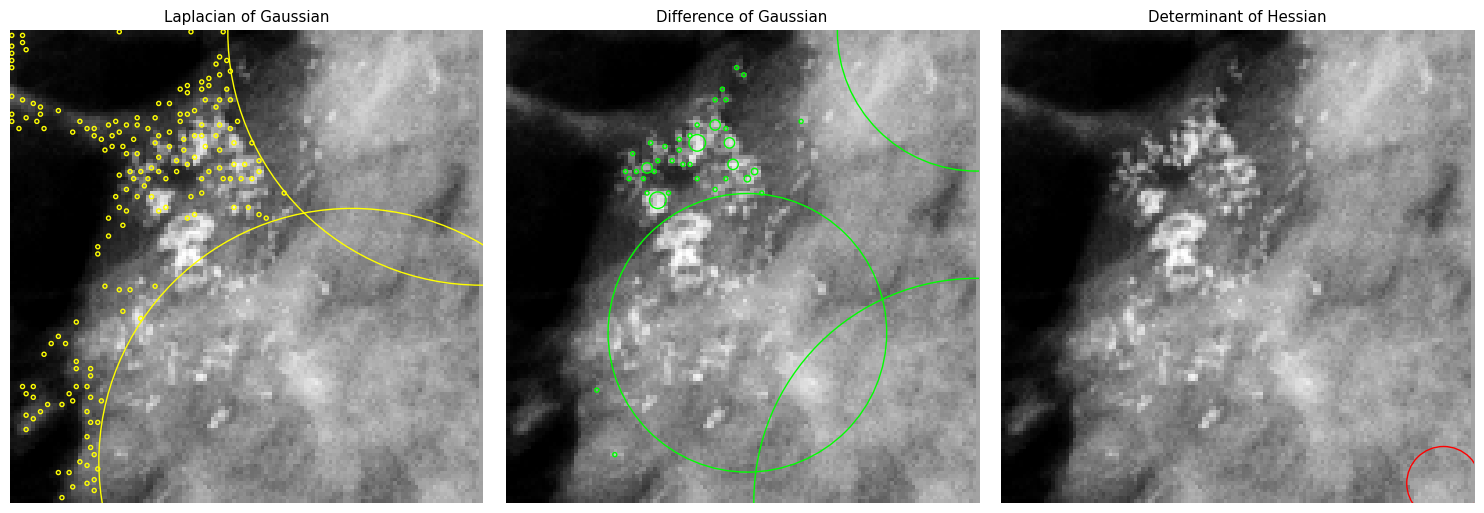

Parametros: min_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
0.8
el blob es: 0
el blob es: 1
el blob es: 2


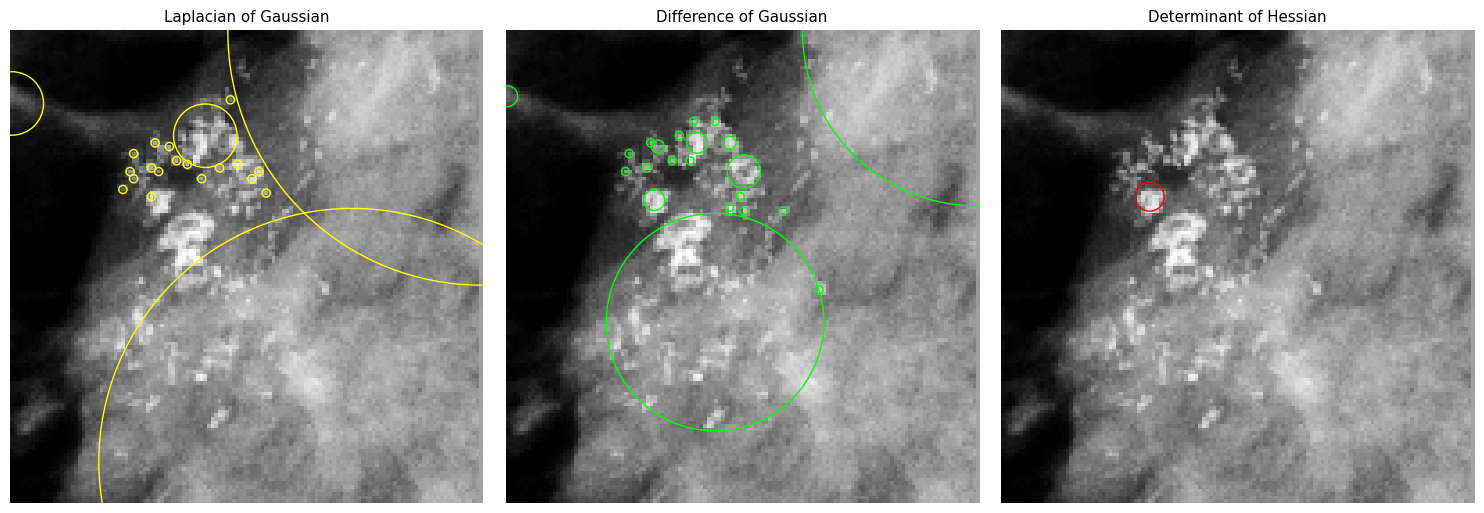

Parametros: min_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
1
el blob es: 0
el blob es: 1
el blob es: 2


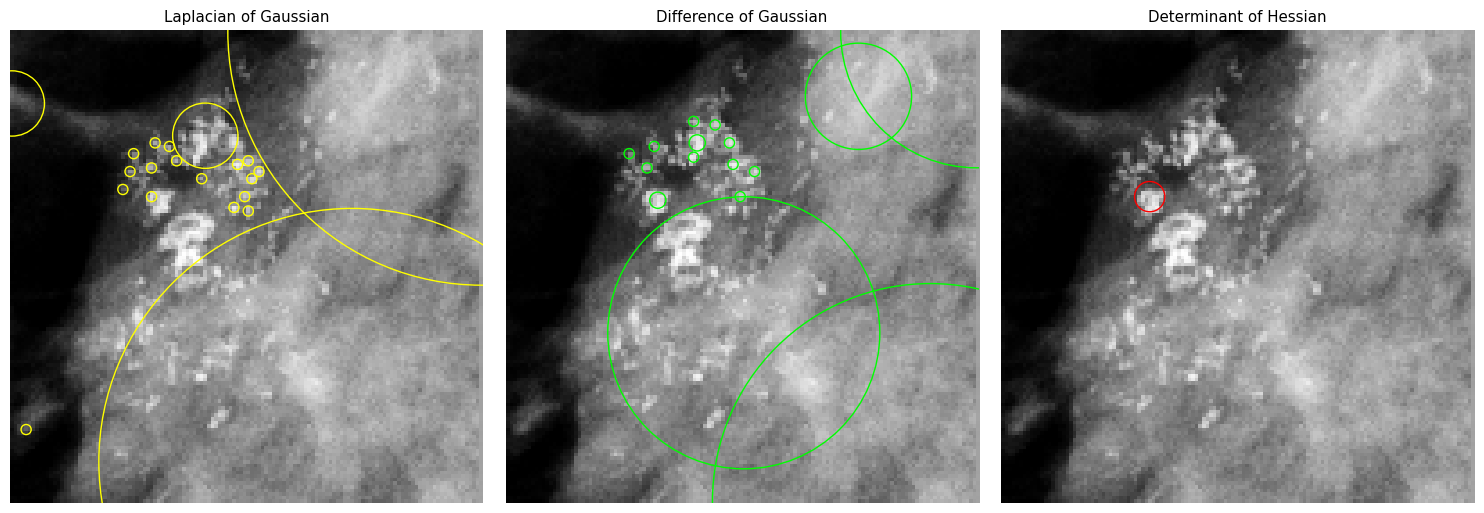

Parametros: min_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
2
el blob es: 0
el blob es: 1
el blob es: 2


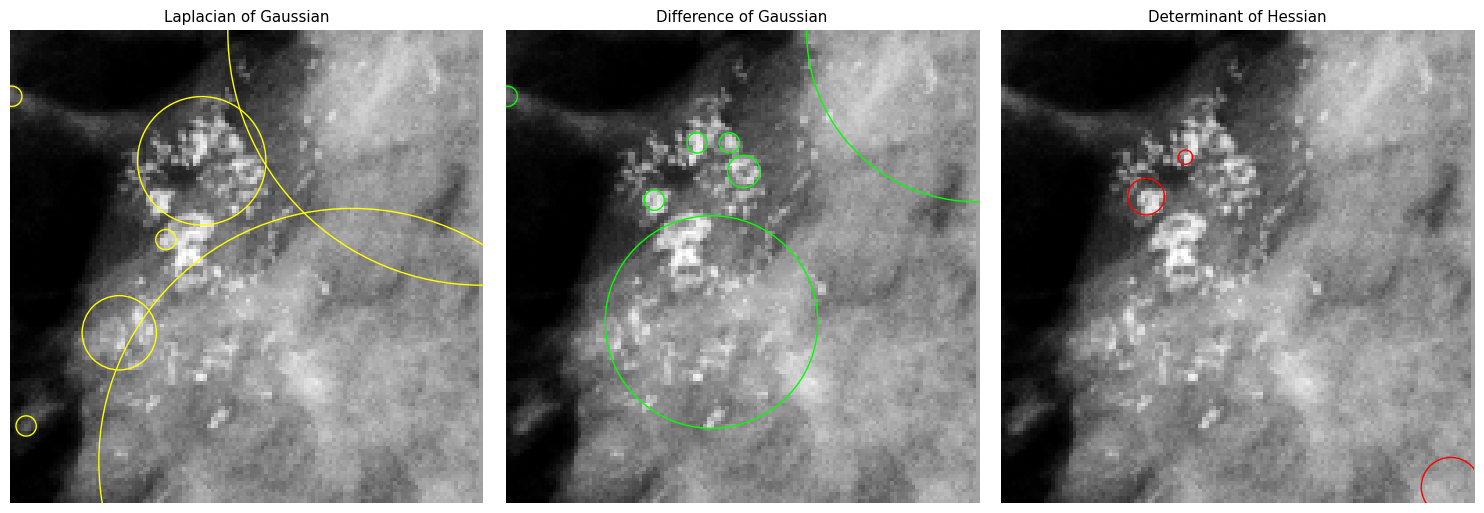

Min_sigma = 0.1
Blobs encontrados por blobs_log: 208
Blobs encontrados por blobs_dog: 42
Blobs encontrados por blobs_doh: 1
Min_sigma = 0.2
Blobs encontrados por blobs_log: 156
Blobs encontrados por blobs_dog: 41
Blobs encontrados por blobs_doh: 1
Min_sigma = 0.4
Blobs encontrados por blobs_log: 180
Blobs encontrados por blobs_dog: 42
Blobs encontrados por blobs_doh: 1
Min_sigma = 0.8
Blobs encontrados por blobs_log: 22
Blobs encontrados por blobs_dog: 22
Blobs encontrados por blobs_doh: 1
Min_sigma = 1
Blobs encontrados por blobs_log: 21
Blobs encontrados por blobs_dog: 16
Blobs encontrados por blobs_doh: 1
Min_sigma = 2
Blobs encontrados por blobs_log: 7
Blobs encontrados por blobs_dog: 7
Blobs encontrados por blobs_doh: 3


In [ ]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

image = recorte_209_rgb
image_gray =  rgb2gray(image)


min_sigma = [0.1, 0.2, 0.4, 0.8, 1,2]


for j in min_sigma:
    blobs_log = blob_log(image_gray, min_sigma=j, threshold=0.1)
    # Compute radii in the 3rd column.
    print("Parametros: min_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian")
    blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

    blobs_dog = blob_dog(image_gray, min_sigma=j,threshold=.1)
    blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

    blobs_doh = blob_doh(image_gray, min_sigma=j,threshold=0.01)

    blobs_list = [blobs_log, blobs_dog, blobs_doh]
    colors = ['yellow', 'lime', 'red']
    titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
              'Determinant of Hessian']
    sequence = zip(blobs_list, colors, titles)
    print(j)

    #fig,axes = plt.subplots(1,2, figsize=(15, 3), sharex=True, sharey=True)
    #ax = axes.ravel()

    fig, axes = plt.subplots( 1,3,figsize=(15, 5))
    ax = axes.ravel()

    for idx, (blobs, color, title) in enumerate(sequence):
        print("el blob es:", idx)
        axes[idx].set_title(title)
        axes[idx].imshow(image_gray, cmap="gray")
        for blob in blobs:
            y, x, r = blob
            #print("el radio es:", r)
            c = plt.Circle((x, y), r, color=color, linewidth=1, fill=False)
            ax[idx].add_patch(c)
        ax[idx].set_axis_off()

    #graficar_imagen(recorte_209_rgb, 'img_rgb', tamaño=60)

    plt.tight_layout()
    plt.show()

##############
for j1 in min_sigma:
    blobs_log = blob_log(image_gray, min_sigma=j1, threshold=0.1)
    blobs_dog = blob_dog(image_gray, min_sigma=j1, threshold=0.1)
    blobs_doh = blob_doh(image_gray, min_sigma=j1, threshold=0.01)

    print(f"Min_sigma = {j1}")
    print(f"Blobs encontrados por blobs_log: {len(blobs_log)}")
    print(f"Blobs encontrados por blobs_dog: {len(blobs_dog)}")
    print(f"Blobs encontrados por blobs_doh: {len(blobs_doh)}")


In [ ]:
# MIN-sigma sin filtro y con datos estadisticos

from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import numpy as np
from scipy import stats

image = recorte_209_rgb
image_gray = rgb2gray(image)

min_sigma = [0.1, 0.2, 0.4, 0.8, 1, 2]

for j in min_sigma:
    blobs_log = blob_log(image_gray, min_sigma=j, threshold=0.1)
    blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

    blobs_dog = blob_dog(image_gray, min_sigma=j, threshold=0.1)
    blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

    blobs_doh = blob_doh(image_gray, min_sigma=j, threshold=0.01)

    blob_lists = [blobs_log, blobs_dog, blobs_doh]
    detector_names = ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']

    print(f"Para min_sigma = {j}:")
    for idx, (blobs, detector_name) in enumerate(zip(blob_lists, detector_names)):
        radii = blobs[:, 2]
        max_radius = np.max(radii)
        min_radius = np.min(radii)
        avg_radius = np.mean(radii)
        std_deviation = np.std(radii)
        median_radius = np.median(radii)

        # Calcular la moda
        unique_radii, counts = np.unique(radii, return_counts=True)
        mode_radius = unique_radii[np.argmax(counts)]

        print(f"Detector: {detector_name}")
        print(f"Radio Máximo: {max_radius}")
        print(f"Radio Mínimo: {min_radius}")
        print(f"Promedio del Radio: {avg_radius}")
        print(f"Desviación Estándar de r: {std_deviation}")
        print(f"Mediana de r: {median_radius}")
        print(f"Moda de r: {mode_radius}")
        print(f"Número de blobs encontrados: {len(blobs)}")
        print("-" * 30)



Para min_sigma = 0.1:
Detector: Laplacian of Gaussian
Radio Máximo: 70.71067811865476
Radio Mínimo: 0.14142135623730953
Promedio del Radio: 0.8953664071178379
Desviación Estándar de r: 6.964101915052272
Mediana de r: 0.14142135623730953
Moda de r: 0.14142135623730953
Número de blobs encontrados: 208
------------------------------
Detector: Difference of Gaussian
Radio Máximo: 63.69051672525778
Radio Mínimo: 0.57926187514802
Promedio del Radio: 4.137889848681442
Desviación Estándar de r: 12.477268677610224
Mediana de r: 0.57926187514802
Moda de r: 0.57926187514802
Número de blobs encontrados: 42
------------------------------
Detector: Determinant of Hessian
Radio Máximo: 10.066666666666665
Radio Mínimo: 10.066666666666665
Promedio del Radio: 10.066666666666665
Desviación Estándar de r: 0.0
Mediana de r: 10.066666666666665
Moda de r: 10.066666666666665
Número de blobs encontrados: 1
------------------------------
Para min_sigma = 0.2:
Detector: Laplacian of Gaussian
Radio Máximo: 70.710

## 3.1.1. MIN-SIGMA - con filtro (r)

0.1
el blob es: 0
el blob es: 1
el blob es: 2


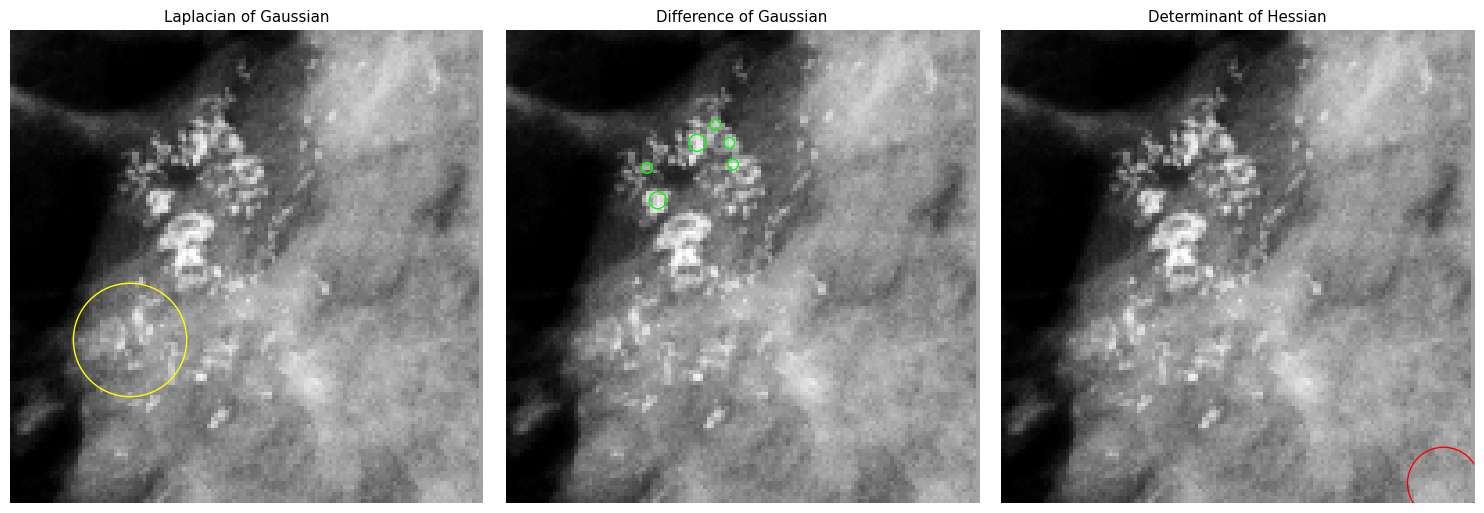

0.2
el blob es: 0
el blob es: 1
el blob es: 2


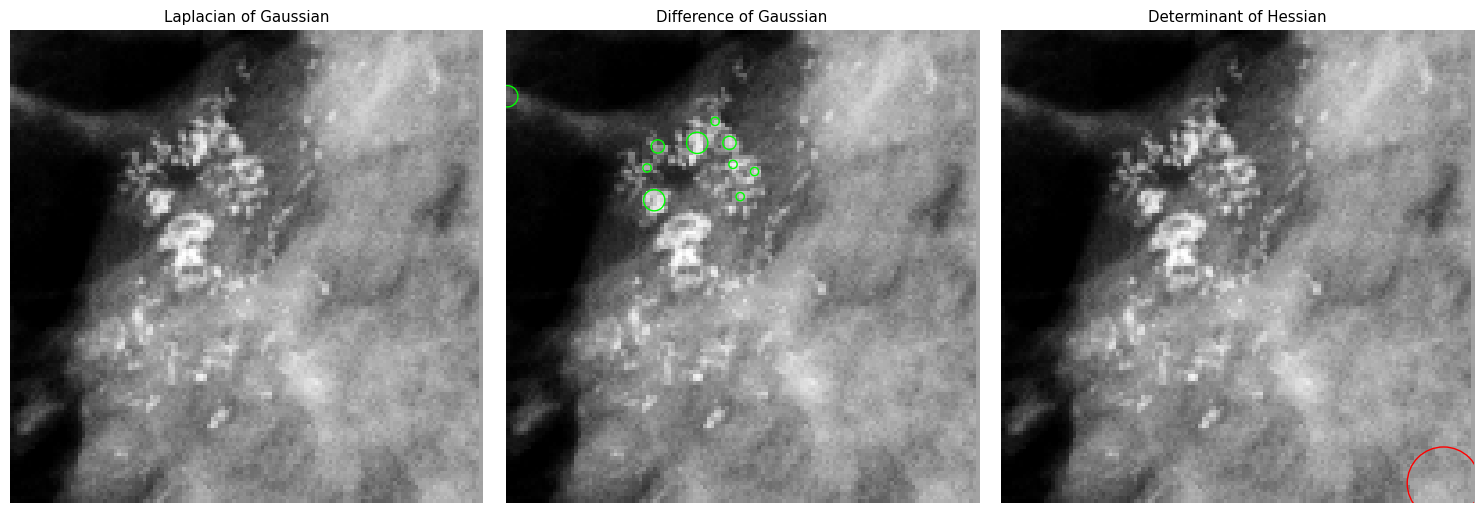

0.4
el blob es: 0
el blob es: 1
el blob es: 2


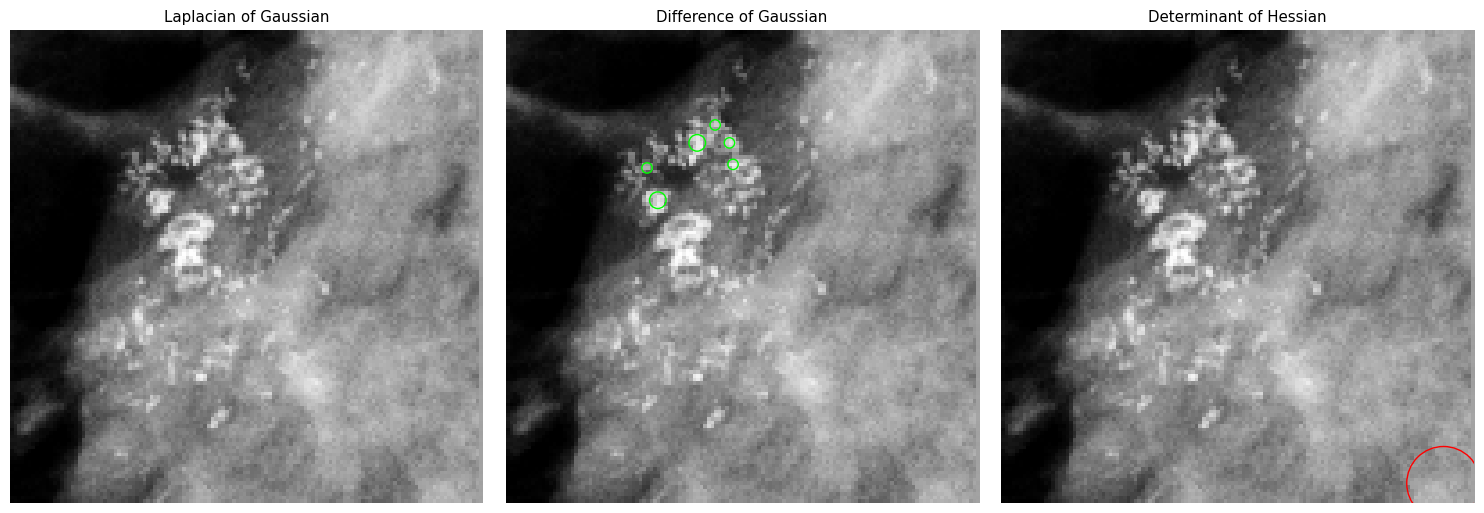

0.8
el blob es: 0
el blob es: 1
el blob es: 2


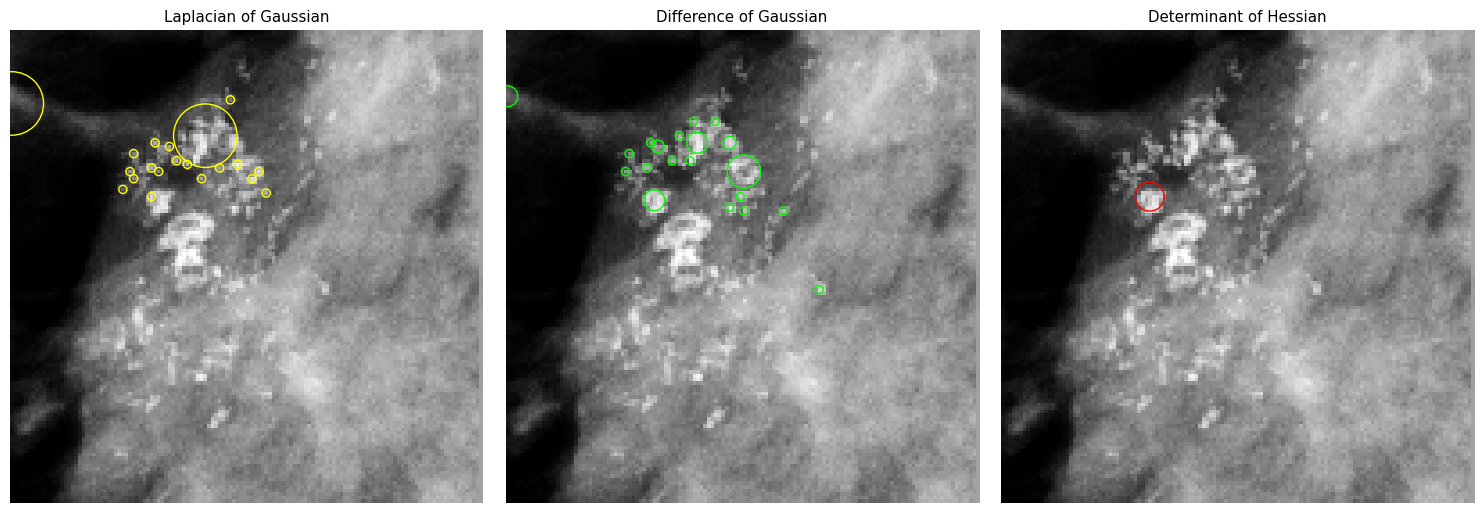

1
el blob es: 0
el blob es: 1
el blob es: 2


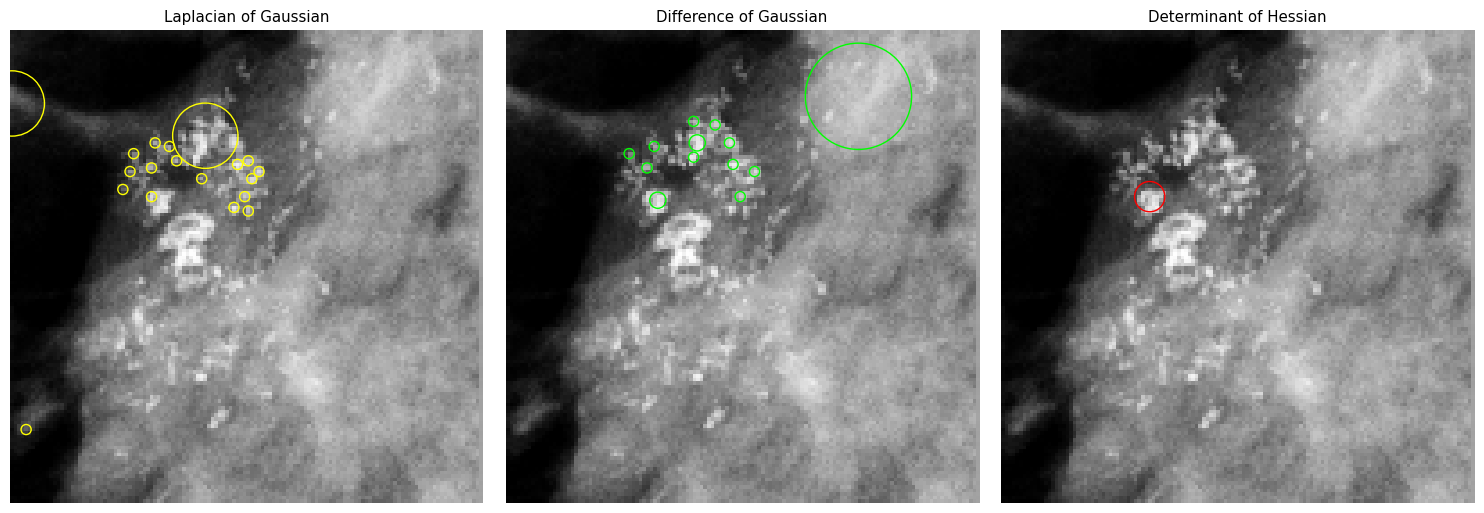

2
el blob es: 0
el blob es: 1
el blob es: 2


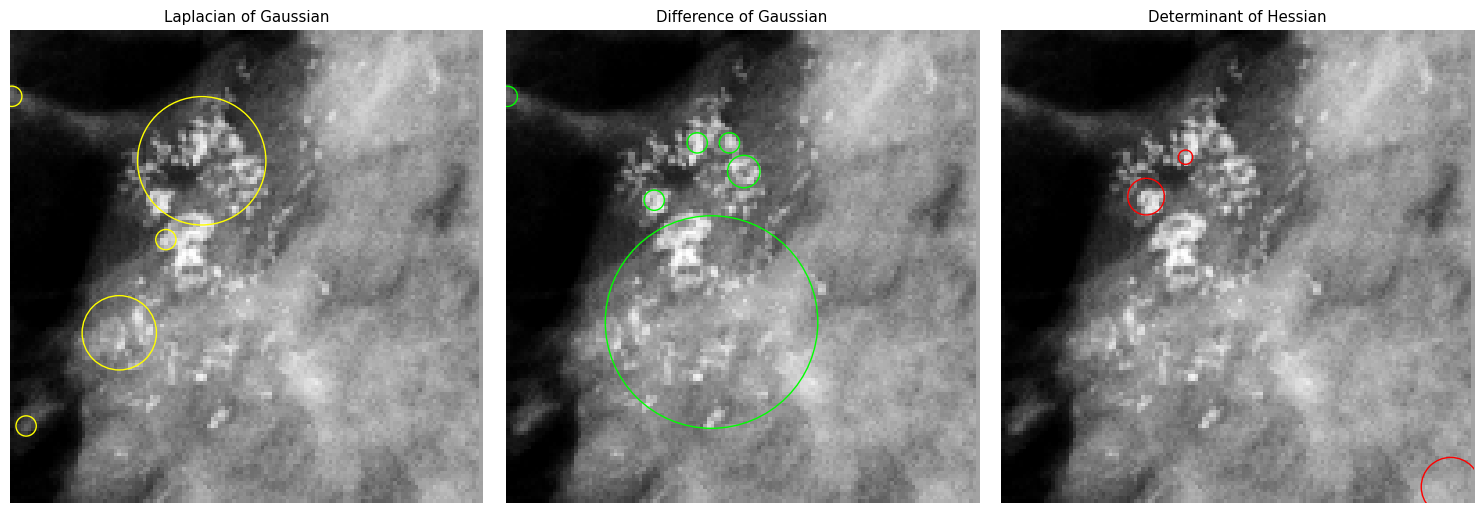

Min_sigma = 0.1
Blobs encontrados por blobs_log: 208
Blobs encontrados por blobs_dog: 42
Blobs encontrados por blobs_doh: 1
Min_sigma = 0.2
Blobs encontrados por blobs_log: 156
Blobs encontrados por blobs_dog: 41
Blobs encontrados por blobs_doh: 1
Min_sigma = 0.4
Blobs encontrados por blobs_log: 180
Blobs encontrados por blobs_dog: 42
Blobs encontrados por blobs_doh: 1
Min_sigma = 0.8
Blobs encontrados por blobs_log: 22
Blobs encontrados por blobs_dog: 22
Blobs encontrados por blobs_doh: 1
Min_sigma = 1
Blobs encontrados por blobs_log: 21
Blobs encontrados por blobs_dog: 16
Blobs encontrados por blobs_doh: 1
Min_sigma = 2
Blobs encontrados por blobs_log: 7
Blobs encontrados por blobs_dog: 7
Blobs encontrados por blobs_doh: 3


In [ ]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

image = recorte_209_rgb
image_gray = rgb2gray(image)

min_sigma = [0.1, 0.2, 0.4, 0.8, 1, 2]

for j in min_sigma:
    blobs_log = blob_log(image_gray, min_sigma=j, threshold=0.1)
    blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

    blobs_dog = blob_dog(image_gray, min_sigma=j, threshold=0.1)
    blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

    blobs_doh = blob_doh(image_gray, min_sigma=j, threshold=0.01)

    blobs_list = [blobs_log, blobs_dog, blobs_doh]
    colors = ['yellow', 'lime', 'red']
    titles = ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']
    sequence = zip(blobs_list, colors, titles)
    print(j)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    ax = axes.ravel()

    for idx, (blobs, color, title) in enumerate(sequence):
        print("el blob es:", idx)
        axes[idx].set_title(title)
        axes[idx].imshow(image_gray, cmap="gray")
        for blob in blobs:
            y, x, r = blob
            if 1 <= r <= 30:  # Agregar la condición para r
               # print("el radio es:", r)
                c = plt.Circle((x, y), r, color=color, linewidth=1, fill=False)
                ax[idx].add_patch(c)
        ax[idx].set_axis_off()

    plt.tight_layout()
    plt.show()

##############
for j1 in min_sigma:
    blobs_log = blob_log(image_gray, min_sigma=j1, threshold=0.1)
    blobs_dog = blob_dog(image_gray, min_sigma=j1, threshold=0.1)
    blobs_doh = blob_doh(image_gray, min_sigma=j1, threshold=0.01)

    print(f"Min_sigma = {j1}")
    print(f"Blobs encontrados por blobs_log: {len(blobs_log)}")
    print(f"Blobs encontrados por blobs_dog: {len(blobs_dog)}")
    print(f"Blobs encontrados por blobs_doh: {len(blobs_doh)}")



## 3.2. MAX-SIGMA

La desviación estándar máxima para el núcleo gaussiano. Manténgalo alto para detectar manchas más grandes. Las desviaciones estándar del filtro gaussiano se dan para cada eje como una secuencia o como un único número, en cuyo caso es igual para todos los ejes. Valor máximo 50

Mejor valor obtenido=20

Parametros: max_sigma. FILTRO BLOBS_DOG. Diference of Gaussian
1
el blob es: 0
el blob es: 1
el blob es: 2


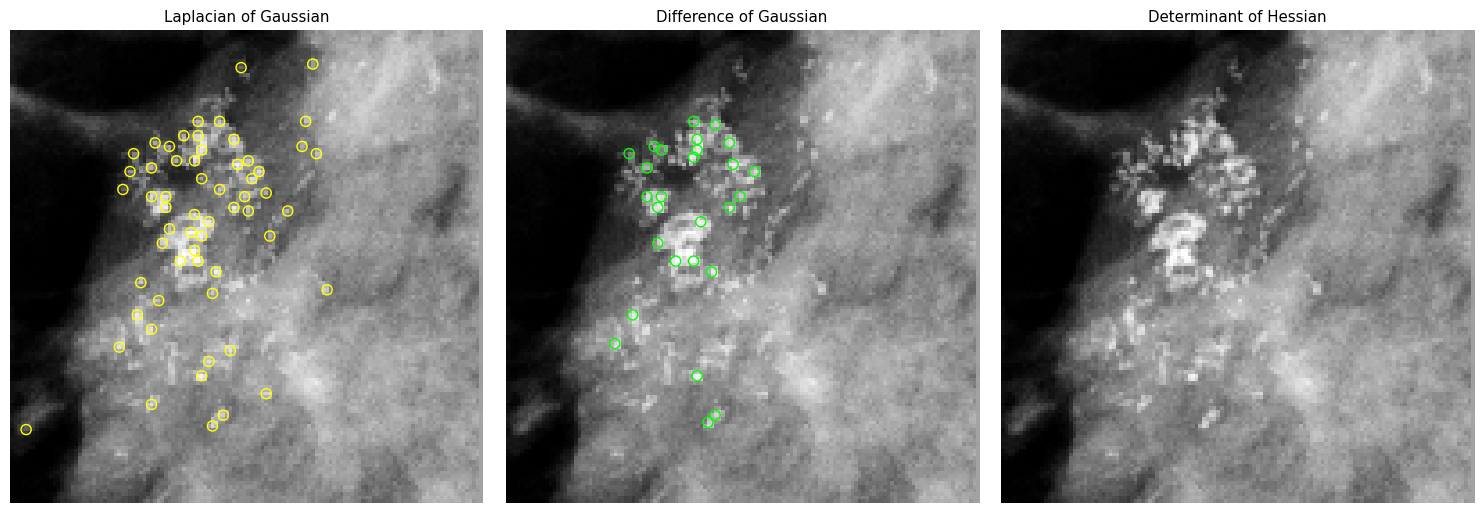

Parametros: max_sigma. FILTRO BLOBS_DOG. Diference of Gaussian
10
el blob es: 0
el blob es: 1
el blob es: 2


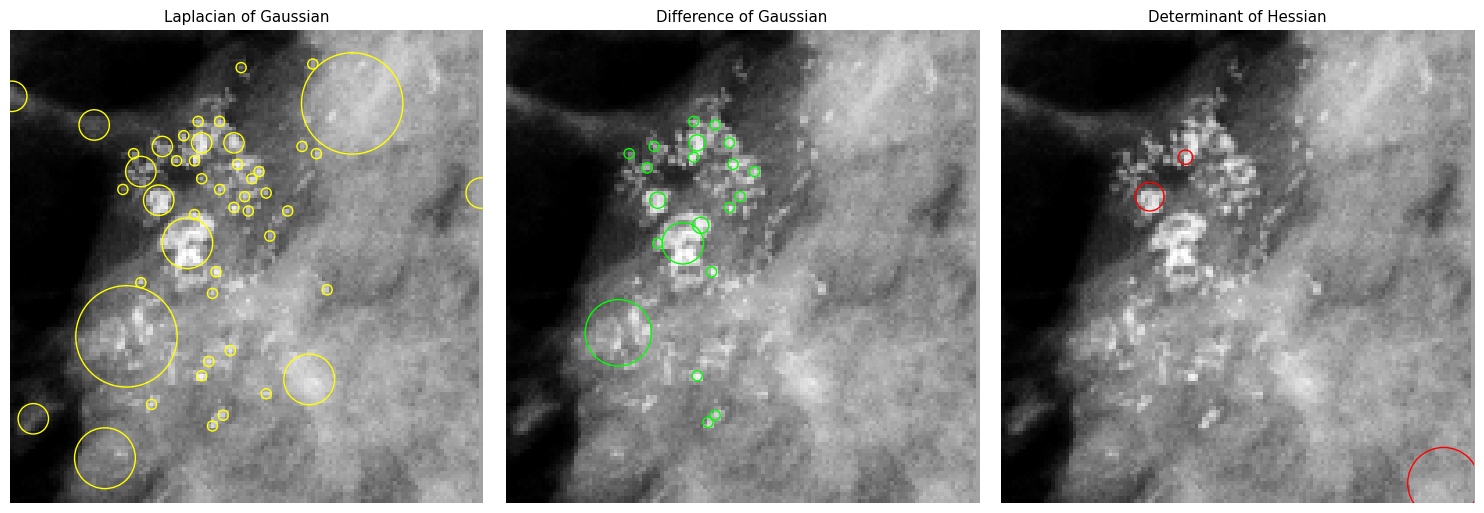

Parametros: max_sigma. FILTRO BLOBS_DOG. Diference of Gaussian
20
el blob es: 0
el blob es: 1
el blob es: 2


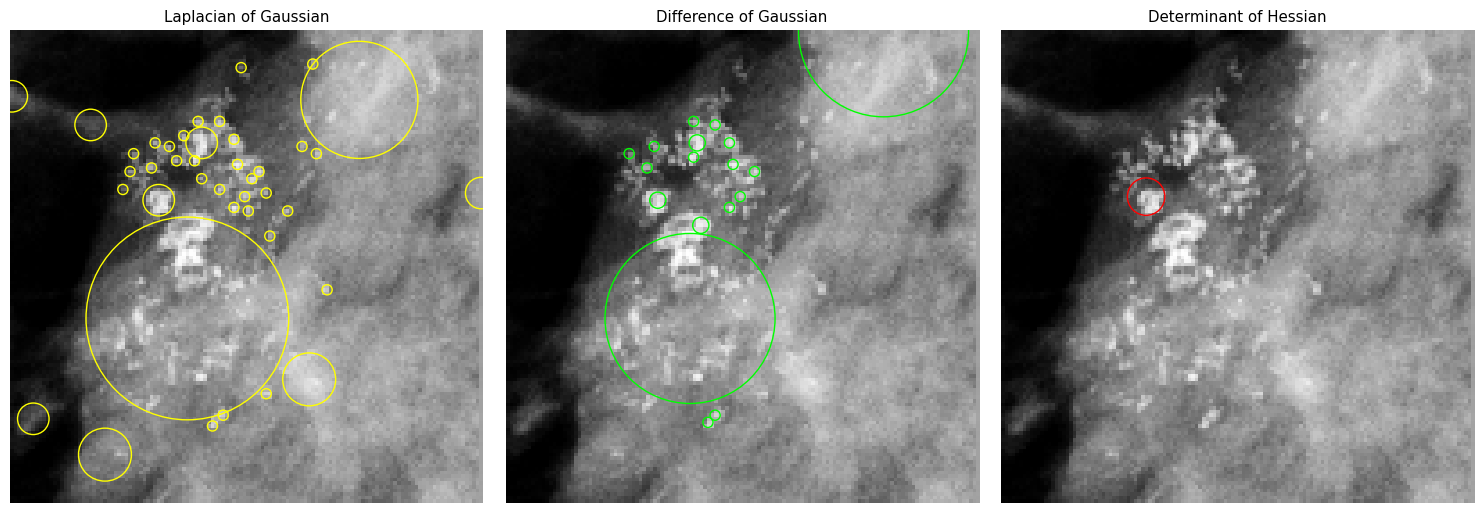

Parametros: max_sigma. FILTRO BLOBS_DOG. Diference of Gaussian
40
el blob es: 0
el blob es: 1
el blob es: 2


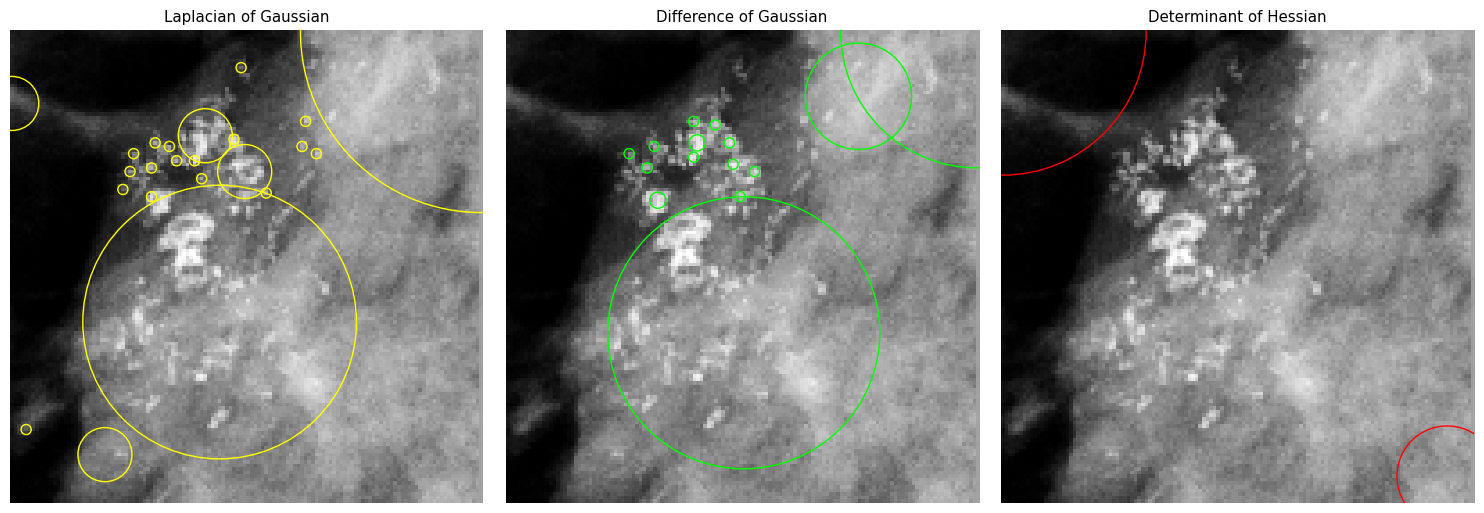

Parametros: max_sigma. FILTRO BLOBS_DOG. Diference of Gaussian
50
el blob es: 0
el blob es: 1
el blob es: 2


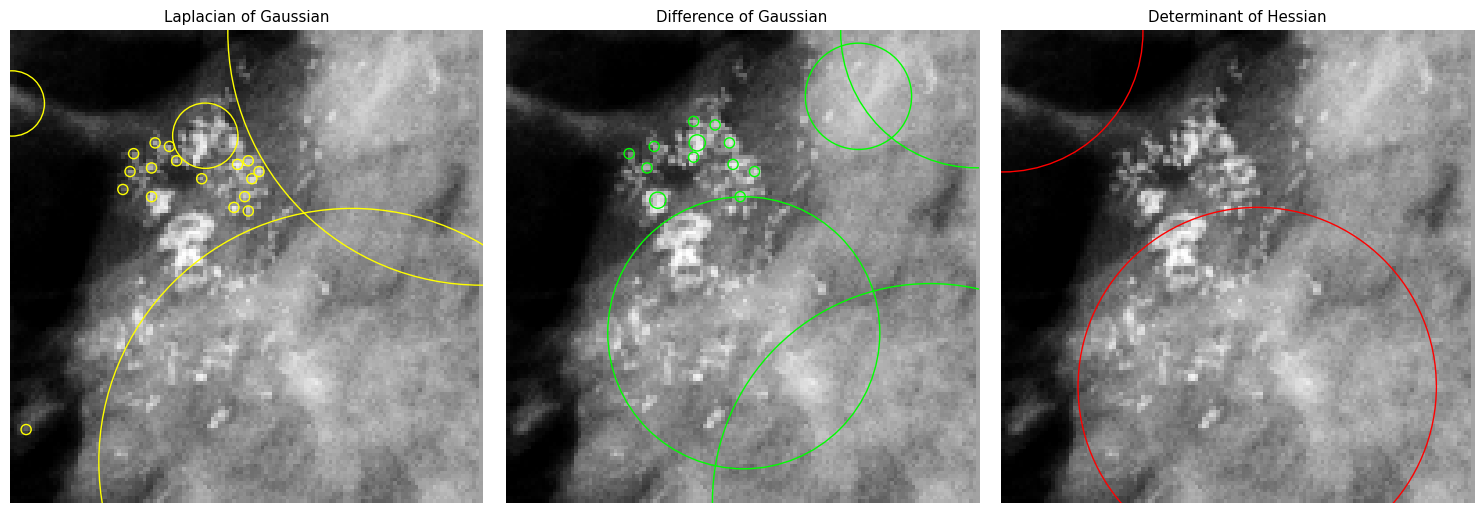

Parametros: max_sigma. FILTRO BLOBS_DOG. Diference of Gaussian
60
el blob es: 0
el blob es: 1
el blob es: 2


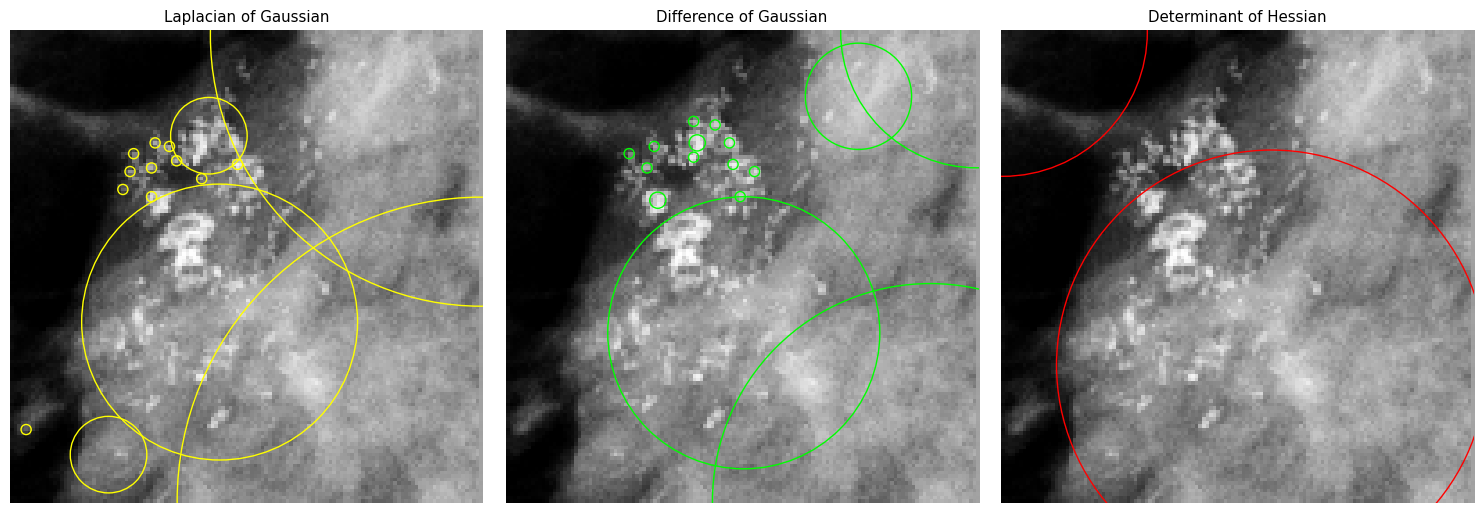

Max_sigma = 1
Blobs encontrados por blobs_log: 59
Blobs encontrados por blobs_dog: 27
Blobs encontrados por blobs_doh: 0
Max_sigma = 10
Blobs encontrados por blobs_log: 48
Blobs encontrados por blobs_dog: 21
Blobs encontrados por blobs_doh: 3
Max_sigma = 20
Blobs encontrados por blobs_log: 41
Blobs encontrados por blobs_dog: 18
Blobs encontrados por blobs_doh: 1
Max_sigma = 40
Blobs encontrados por blobs_log: 23
Blobs encontrados por blobs_dog: 15
Blobs encontrados por blobs_doh: 2
Max_sigma = 50
Blobs encontrados por blobs_log: 21
Blobs encontrados por blobs_dog: 16
Blobs encontrados por blobs_doh: 2
Max_sigma = 60
Blobs encontrados por blobs_log: 16
Blobs encontrados por blobs_dog: 16
Blobs encontrados por blobs_doh: 2


In [ ]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

image = recorte_209_rgb
image_gray =  rgb2gray(image)


max_sigma=[1,10,20, 40, 50,60]


for k in max_sigma:
    blobs_log = blob_log(image_gray, min_sigma=1,max_sigma=k, threshold=0.1)
    # Compute radii in the 3rd column.
    print("Parametros: max_sigma. FILTRO BLOBS_DOG. Diference of Gaussian")
    blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

    blobs_dog = blob_dog(image_gray,min_sigma=1,max_sigma=k,threshold=.1)
    blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

    blobs_doh = blob_doh(image_gray,min_sigma=1, max_sigma=k,threshold=0.01)

    blobs_list = [blobs_log, blobs_dog, blobs_doh]
    colors = ['yellow', 'lime', 'red']
    titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
              'Determinant of Hessian']
    sequence = zip(blobs_list, colors, titles)
    print(k)

    #fig,axes = plt.subplots(1,2, figsize=(15, 3), sharex=True, sharey=True)
    #ax = axes.ravel()

    fig, axes = plt.subplots( 1,3,figsize=(15, 5))
    ax = axes.ravel()

    for idx, (blobs, color, title) in enumerate(sequence):
        print("el blob es:", idx)
        axes[idx].set_title(title)
        axes[idx].imshow(image_gray, cmap="gray")
        for blob in blobs:
            y, x, r = blob
            #print("el radio es:", r)
            c = plt.Circle((x, y), r, color=color, linewidth=1, fill=False)
            ax[idx].add_patch(c)
        ax[idx].set_axis_off()

    #graficar_imagen(recorte_209_rgb, 'img_rgb', tamaño=60)

    plt.tight_layout()
    plt.show()

##############
for k1 in max_sigma:
    blobs_log = blob_log(image_gray, min_sigma=1, max_sigma=k1,threshold=0.1)
    blobs_dog = blob_dog(image_gray, min_sigma=1, max_sigma=k1,threshold=0.1)
    blobs_doh = blob_doh(image_gray,min_sigma=1, max_sigma=k1, threshold=0.01)

    print(f"Max_sigma = {k1}")
    print(f"Blobs encontrados por blobs_log: {len(blobs_log)}")
    print(f"Blobs encontrados por blobs_dog: {len(blobs_dog)}")
    print(f"Blobs encontrados por blobs_doh: {len(blobs_doh)}")


*  MAX_SIGMA sin radio pero con análisis estadistico

In [ ]:
#MAX_SIGMA sin radio pero con anáñisis estadistico

from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import numpy as np

image = recorte_209_rgb
image_gray = rgb2gray(image)

max_sigma = [10, 20, 40, 50, 60]

for k in max_sigma:
    blobs_log = blob_log(image_gray, min_sigma=1, max_sigma=k, threshold=0.1)
    blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

    blobs_dog = blob_dog(image_gray, min_sigma=1, max_sigma=k, threshold=0.1)
    blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

    blobs_doh = blob_doh(image_gray, min_sigma=1, max_sigma=k, threshold=0.01)

    blob_lists = [blobs_log, blobs_dog, blobs_doh]
    detector_names = ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']

    print(f"Para max_sigma = {k}:")
    for idx, (blobs, detector_name) in enumerate(zip(blob_lists, detector_names)):
        radii = blobs[:, 2]
        max_radius = np.max(radii)
        min_radius = np.min(radii)
        avg_radius = np.mean(radii)
        std_deviation = np.std(radii)
        median_radius = np.median(radii)

        # Calcular la moda
        unique_radii, counts = np.unique(radii, return_counts=True)
        mode_radius = unique_radii[np.argmax(counts)]

        print(f"Detector: {detector_name}")
        print(f"Radio Mínimo: {min_radius}")
        print(f"Radio Máximo: {max_radius}")
        print(f"Mediana de r: {median_radius}")
        print(f"Moda de r: {mode_radius}")
        print(f"Desviación Estándar de r: {std_deviation}")
        print(f"Promedio del Radio: {avg_radius}")
        print(f"Número de blobs encontrados: {len(blobs)}")
        print("-" * 30)




Para max_sigma = 10:
Detector: Laplacian of Gaussian
Radio Mínimo: 1.4142135623730951
Radio Máximo: 14.142135623730951
Mediana de r: 1.4142135623730951
Moda de r: 1.4142135623730951
Desviación Estándar de r: 2.900550713992852
Promedio del Radio: 2.7695015596473116
Número de blobs encontrados: 48
------------------------------
Detector: Difference of Gaussian
Radio Mínimo: 1.4142135623730951
Radio Máximo: 9.268190002368318
Mediana de r: 1.4142135623730951
Moda de r: 1.4142135623730951
Desviación Estándar de r: 1.859543415542029
Promedio del Radio: 2.117926231009947
Número de blobs encontrados: 21
------------------------------
Detector: Determinant of Hessian
Radio Mínimo: 2.0
Radio Máximo: 10.0
Mediana de r: 4.0
Moda de r: 2.0
Desviación Estándar de r: 3.39934634239519
Promedio del Radio: 5.333333333333333
Número de blobs encontrados: 3
------------------------------
Para max_sigma = 20:
Detector: Laplacian of Gaussian
Radio Mínimo: 1.4142135623730951
Radio Máximo: 28.284271247461902
M

## 3.2.1. MAX-SIGMA - con filtro (r)

Parametros: min_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
1
el blob es: 0
el blob es: 1
el blob es: 2


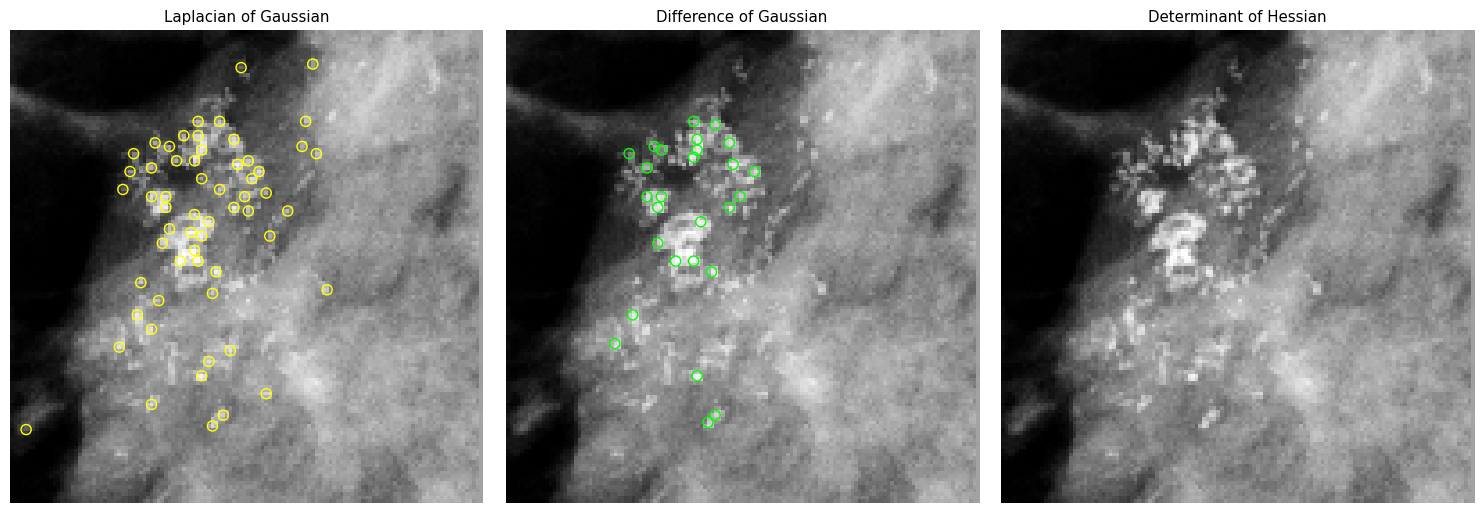

Parametros: min_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
10
el blob es: 0
el blob es: 1
el blob es: 2


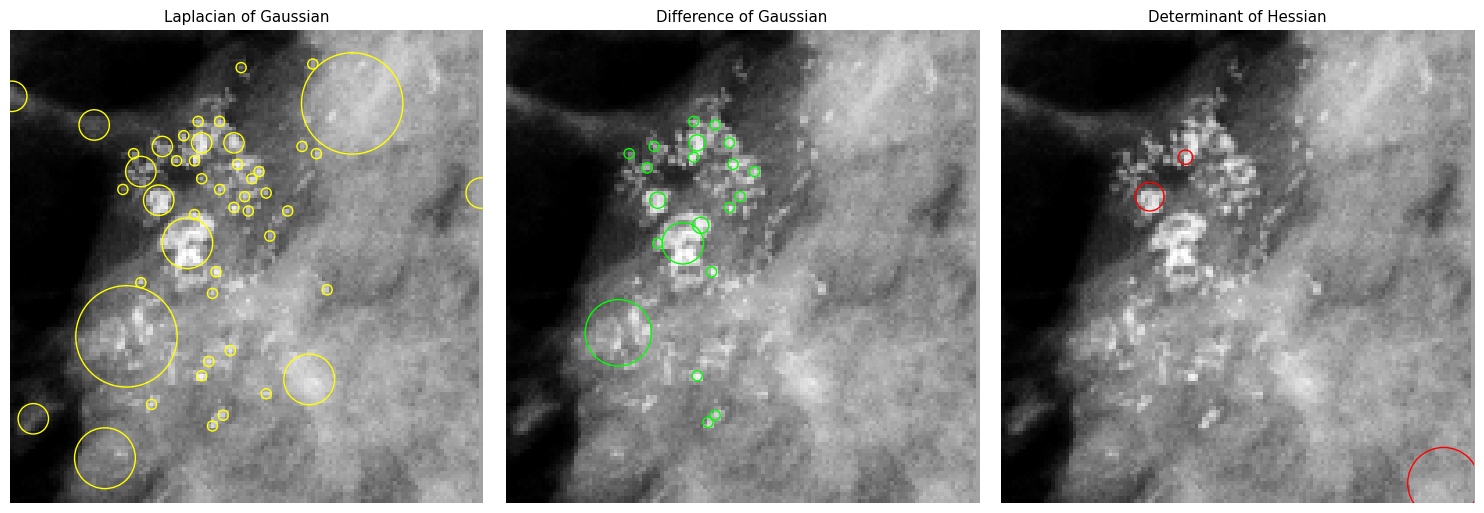

Parametros: min_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
20
el blob es: 0
el blob es: 1
el blob es: 2


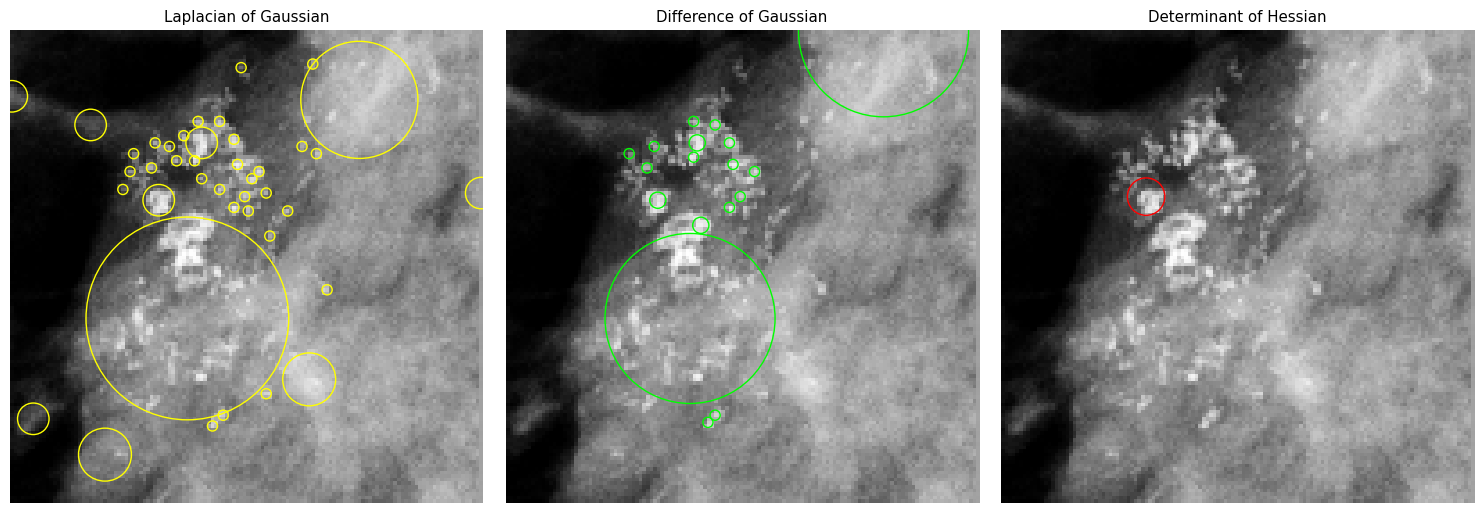

Parametros: min_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
40
el blob es: 0
el blob es: 1
el blob es: 2


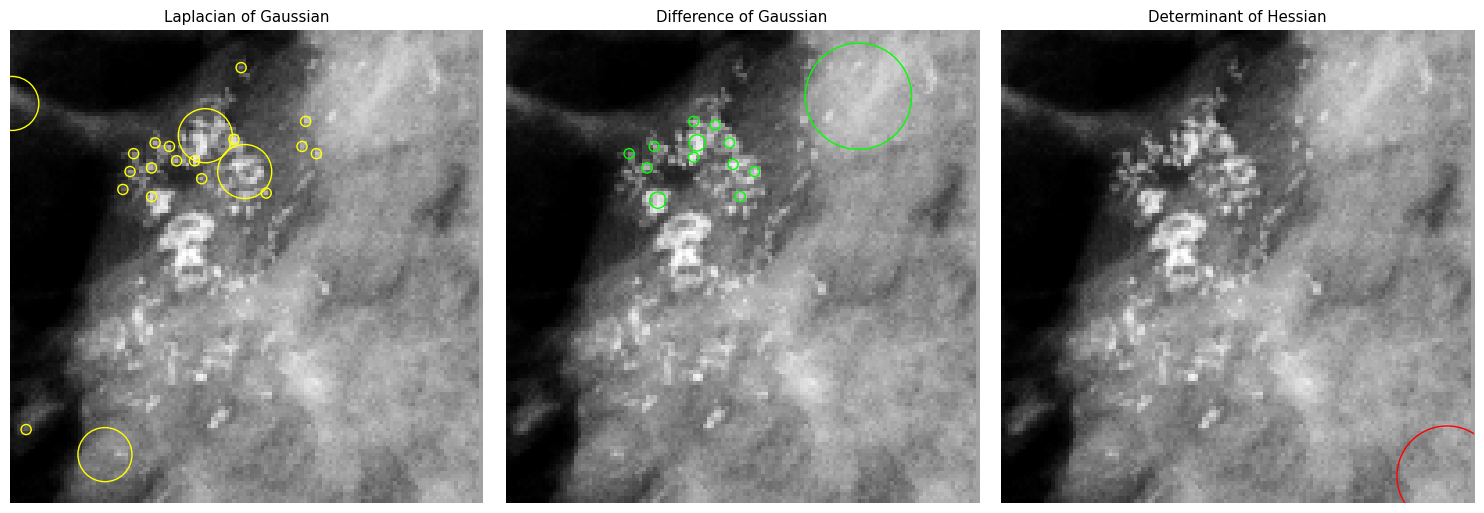

Parametros: min_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
50
el blob es: 0
el blob es: 1
el blob es: 2


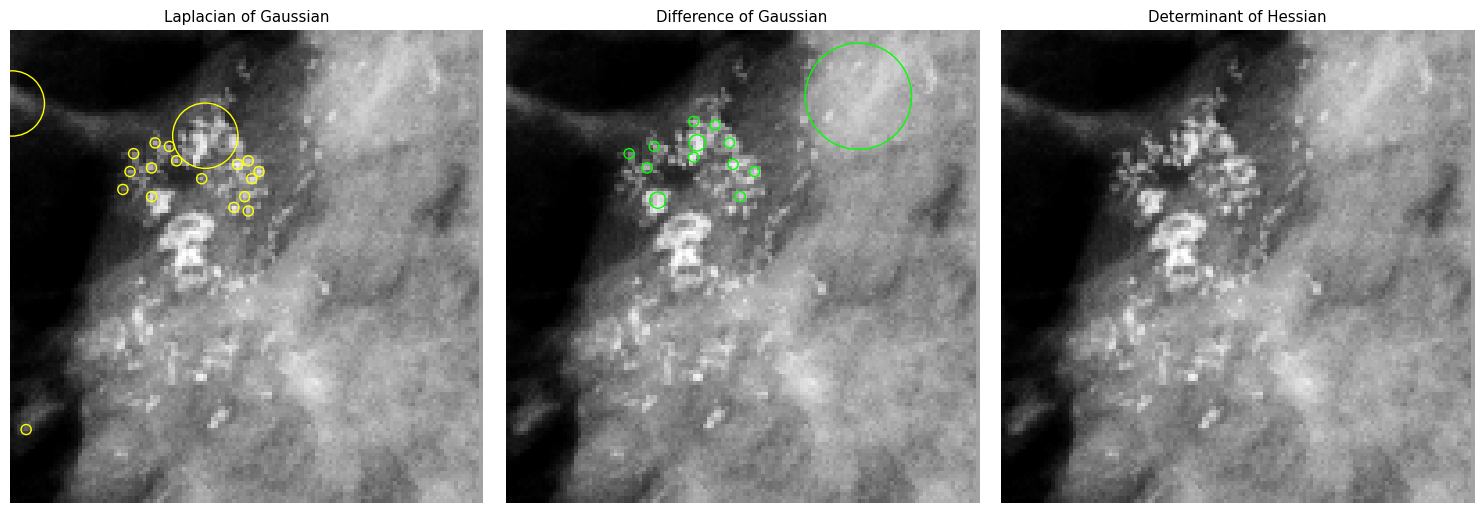

Parametros: min_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
60
el blob es: 0
el blob es: 1
el blob es: 2


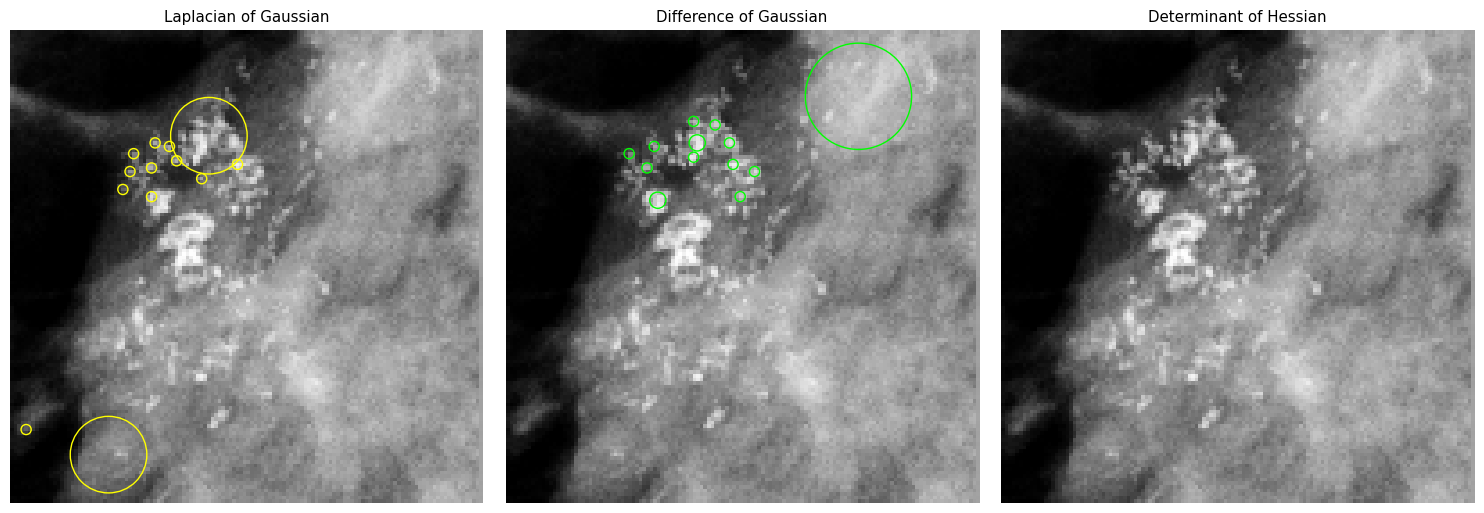

Min_sigma = 1
Blobs encontrados por blobs_log: 59
Blobs encontrados por blobs_dog: 27
Blobs encontrados por blobs_doh: 0
Min_sigma = 10
Blobs encontrados por blobs_log: 48
Blobs encontrados por blobs_dog: 21
Blobs encontrados por blobs_doh: 3
Min_sigma = 20
Blobs encontrados por blobs_log: 41
Blobs encontrados por blobs_dog: 18
Blobs encontrados por blobs_doh: 1
Min_sigma = 40
Blobs encontrados por blobs_log: 23
Blobs encontrados por blobs_dog: 15
Blobs encontrados por blobs_doh: 2
Min_sigma = 50
Blobs encontrados por blobs_log: 21
Blobs encontrados por blobs_dog: 16
Blobs encontrados por blobs_doh: 2
Min_sigma = 60
Blobs encontrados por blobs_log: 16
Blobs encontrados por blobs_dog: 16
Blobs encontrados por blobs_doh: 2


In [ ]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

image = recorte_209_rgb
image_gray =  rgb2gray(image)


max_sigma=[1,10,20, 40, 50,60]


for k in max_sigma:
    blobs_log = blob_log(image_gray, min_sigma=1,max_sigma=k, threshold=0.1)
    # Compute radii in the 3rd column.
    print("Parametros: min_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian")
    blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

    blobs_dog = blob_dog(image_gray,min_sigma=1,max_sigma=k,threshold=.1)
    blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

    blobs_doh = blob_doh(image_gray,min_sigma=1, max_sigma=k,threshold=0.01)

    blobs_list = [blobs_log, blobs_dog, blobs_doh]
    colors = ['yellow', 'lime', 'red']
    titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
              'Determinant of Hessian']
    sequence = zip(blobs_list, colors, titles)
    print(k)

    #fig,axes = plt.subplots(1,2, figsize=(15, 3), sharex=True, sharey=True)
    #ax = axes.ravel()

    fig, axes = plt.subplots( 1,3,figsize=(15, 5))
    ax = axes.ravel()

    for idx, (blobs, color, title) in enumerate(sequence):
        print("el blob es:", idx)
        axes[idx].set_title(title)
        axes[idx].imshow(image_gray, cmap="gray")
        for blob in blobs:
            y, x, r = blob
            if 1 <= r <= 30:  # Agregar la condición para r
              #print("el radio es:", r)
              c = plt.Circle((x, y), r, color=color, linewidth=1, fill=False)
              ax[idx].add_patch(c)
        ax[idx].set_axis_off()

    #graficar_imagen(recorte_209_rgb, 'img_rgb', tamaño=60)

    plt.tight_layout()
    plt.show()

##############
for k1 in max_sigma:
    blobs_log = blob_log(image_gray, min_sigma=1, max_sigma=k1,threshold=0.1)
    blobs_dog = blob_dog(image_gray, min_sigma=1, max_sigma=k1,threshold=0.1)
    blobs_doh = blob_doh(image_gray,min_sigma=1, max_sigma=k1, threshold=0.01)

    print(f"Min_sigma = {k1}")
    print(f"Blobs encontrados por blobs_log: {len(blobs_log)}")
    print(f"Blobs encontrados por blobs_dog: {len(blobs_dog)}")
    print(f"Blobs encontrados por blobs_doh: {len(blobs_doh)}")

## 3.3. NUM-SIGMA


Num_sigma: El número de valores intermedios de desviaciones estándar a considerar entre min_sigma y max_sigma. Se recomienda 10 como valor maximo (https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.blob_log). En este caso se ensayará con los valores. Maximo valor=10

num_sigma=[1,2,4,8,10,11]


NOTA: solo esta en blobs_log y blog doh!!!

Mejor valor obtenido=8 y 10

Parametros: Num_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
1
el blob es: 0
el blob es: 1
el blob es: 2


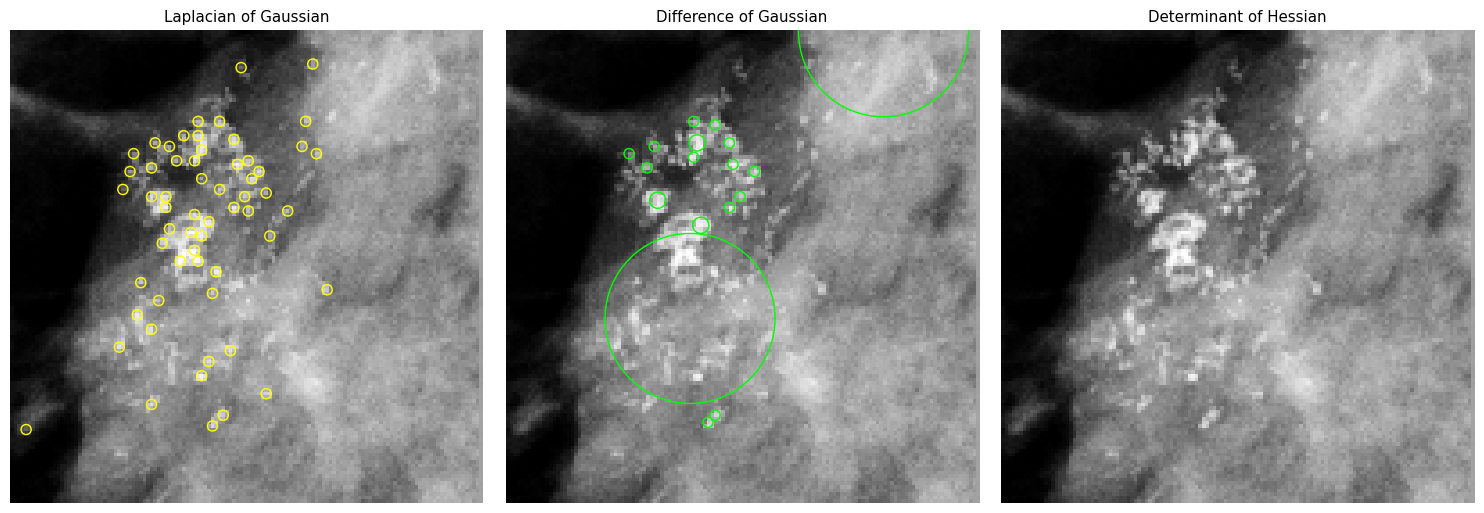

Parametros: Num_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
2
el blob es: 0
el blob es: 1
el blob es: 2


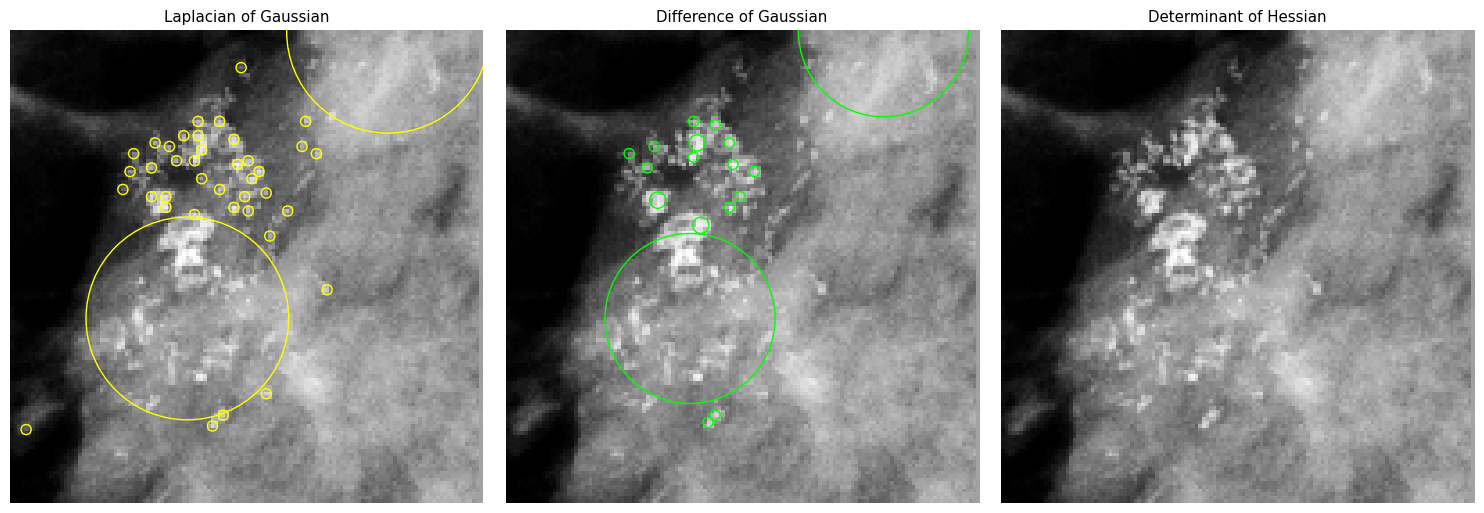

Parametros: Num_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
4
el blob es: 0
el blob es: 1
el blob es: 2


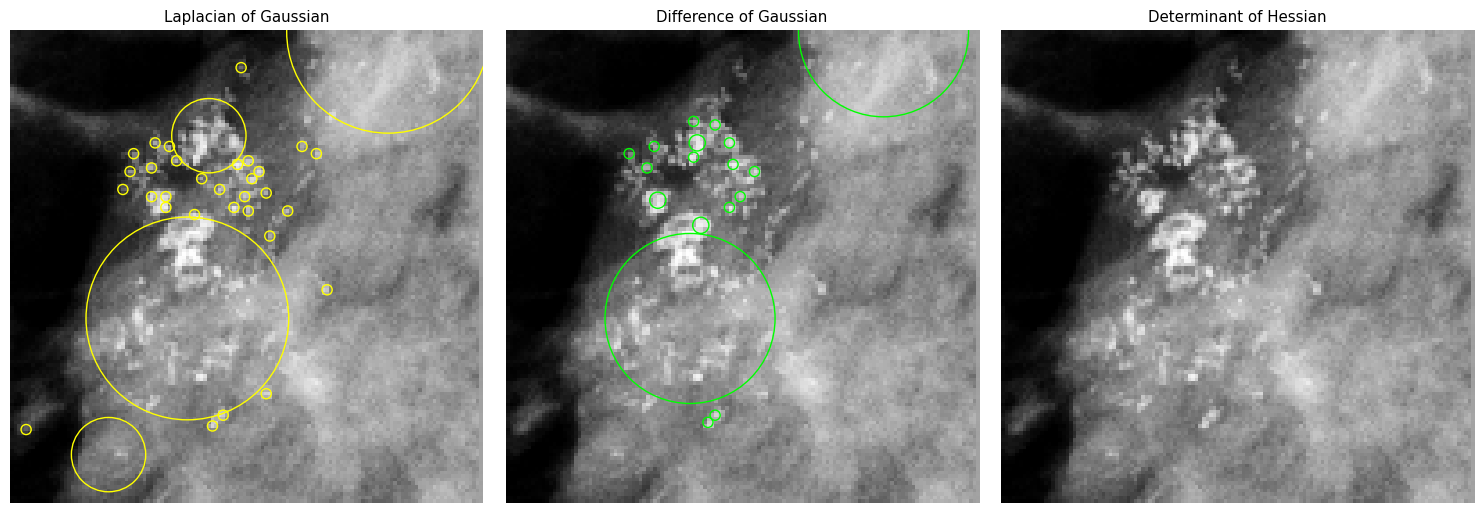

Parametros: Num_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
8
el blob es: 0
el blob es: 1
el blob es: 2


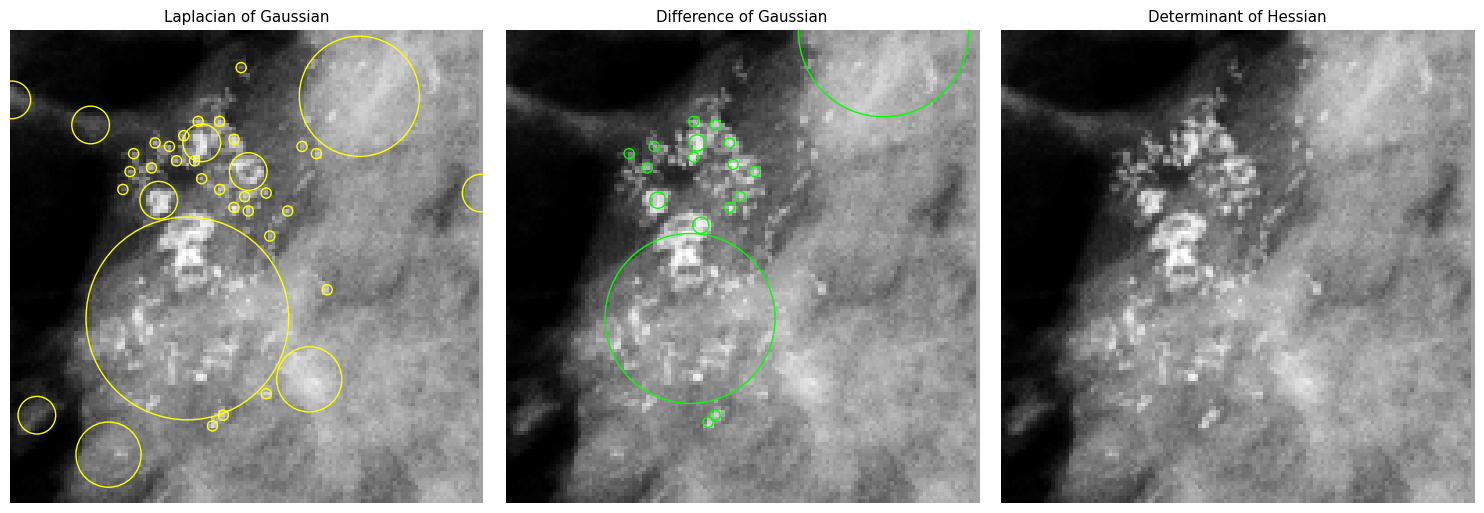

Parametros: Num_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
10
el blob es: 0
el blob es: 1
el blob es: 2


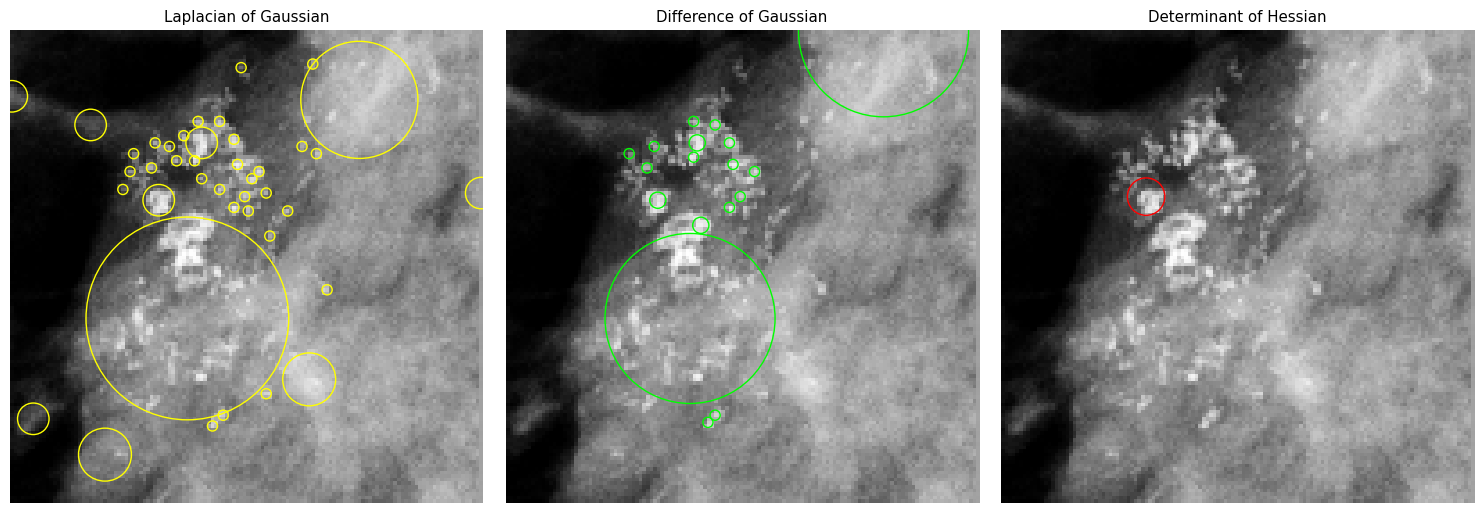

Parametros: Num_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
11
el blob es: 0
el blob es: 1
el blob es: 2


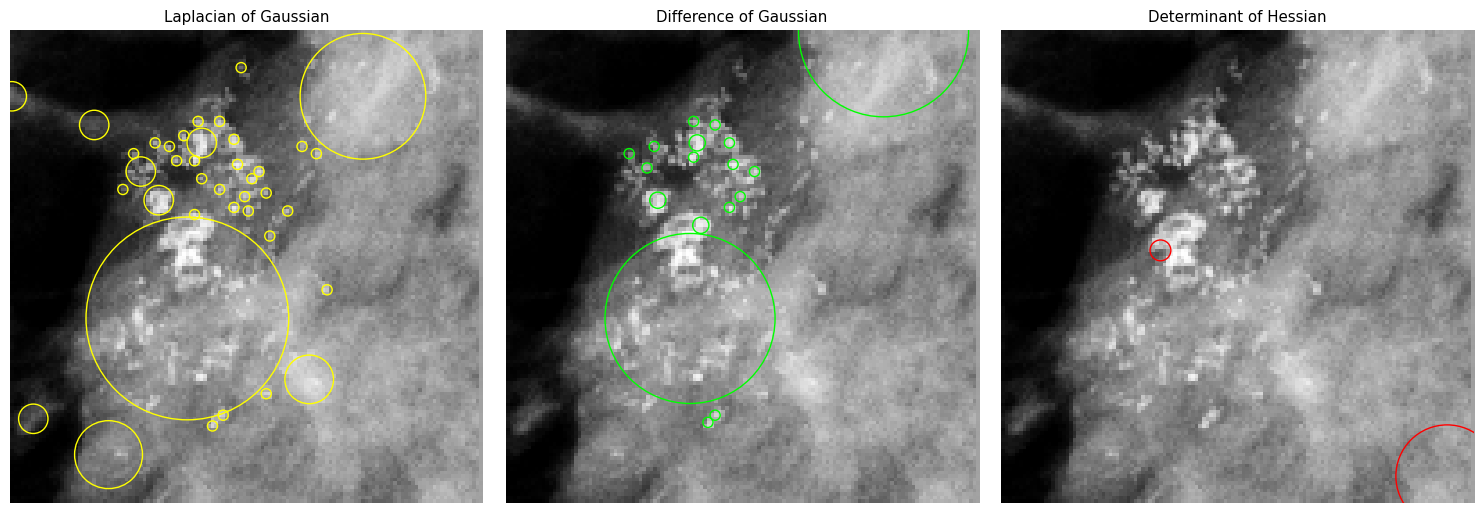

num_sigma = 1
Blobs encontrados por blobs_log: 708
Blobs encontrados por blobs_dog: 244
Blobs encontrados por blobs_doh: 0
num_sigma = 2
Blobs encontrados por blobs_log: 399
Blobs encontrados por blobs_dog: 244
Blobs encontrados por blobs_doh: 0
num_sigma = 4
Blobs encontrados por blobs_log: 357
Blobs encontrados por blobs_dog: 244
Blobs encontrados por blobs_doh: 0
num_sigma = 8
Blobs encontrados por blobs_log: 361
Blobs encontrados por blobs_dog: 244
Blobs encontrados por blobs_doh: 0
num_sigma = 10
Blobs encontrados por blobs_log: 326
Blobs encontrados por blobs_dog: 244
Blobs encontrados por blobs_doh: 1
num_sigma = 11
Blobs encontrados por blobs_log: 309
Blobs encontrados por blobs_dog: 244
Blobs encontrados por blobs_doh: 2


In [ ]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

image = recorte_209_rgb
image_gray =  rgb2gray(image)

num_sigma=[1,2,4,8,10,11]

for l in num_sigma:
    blobs_log = blob_log(image_gray, min_sigma=1, max_sigma=20, num_sigma=l, threshold=0.1)
    # Compute radii in the 3rd column.
    print("Parametros: Num_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian")
    blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

    blobs_dog = blob_dog(image_gray,min_sigma=1, max_sigma=20 , threshold=0.1)
    blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

    blobs_doh = blob_doh(image_gray, min_sigma=1, max_sigma=20, num_sigma=l, threshold=0.01)

    blobs_list = [blobs_log, blobs_dog, blobs_doh]
    colors = ['yellow', 'lime', 'red']
    titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
              'Determinant of Hessian']
    sequence = zip(blobs_list, colors, titles)
    print(l)

    #fig,axes = plt.subplots(1,2, figsize=(15, 3), sharex=True, sharey=True)
    #ax = axes.ravel()

    fig, axes = plt.subplots( 1,3,figsize=(15, 5))
    ax = axes.ravel()

    for idx, (blobs, color, title) in enumerate(sequence):
        print("el blob es:", idx)
        axes[idx].set_title(title)
        axes[idx].imshow(image_gray, cmap="gray")
        for blob in blobs:
            y, x, r = blob
            #print("el radio es:", r)
            c = plt.Circle((x, y), r, color=color, linewidth=1, fill=False)
            ax[idx].add_patch(c)
        ax[idx].set_axis_off()

    #graficar_imagen(recorte_209_rgb, 'img_rgb', tamaño=60)

    plt.tight_layout()
    plt.show()

##############
for l1 in num_sigma:
    blobs_log = blob_log(image_gray, min_sigma=1, max_sigma=20, num_sigma=l1, threshold=0.01)
    blobs_dog = blob_dog(image_gray, min_sigma=1, max_sigma=20, threshold=0.01)
    blobs_doh = blob_doh(image_gray, min_sigma=1, max_sigma=20, num_sigma=l1, threshold=0.01)

    print(f"num_sigma = {l1}")
    print(f"Blobs encontrados por blobs_log: {len(blobs_log)}")
    print(f"Blobs encontrados por blobs_dog: {len(blobs_dog)}")
    print(f"Blobs encontrados por blobs_doh: {len(blobs_doh)}")


## 3.3.1. NUM-SIGMA - con filtro (r)

Parametros: Num_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
1
el blob es: 0
el blob es: 1
el blob es: 2


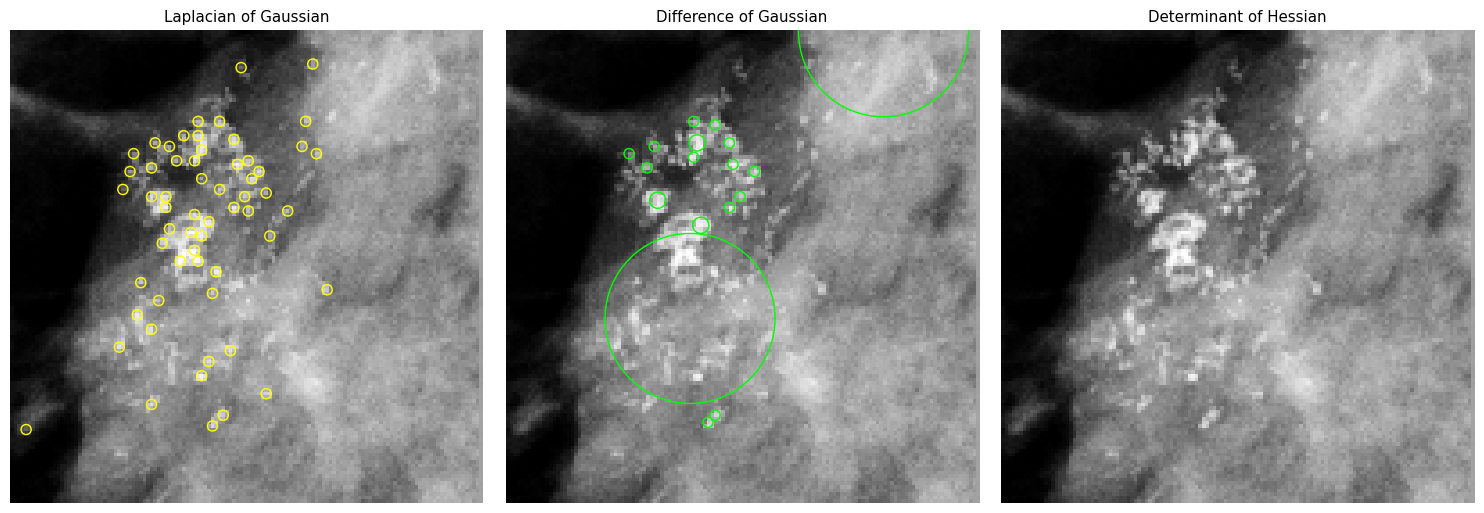

Parametros: Num_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
2
el blob es: 0
el blob es: 1
el blob es: 2


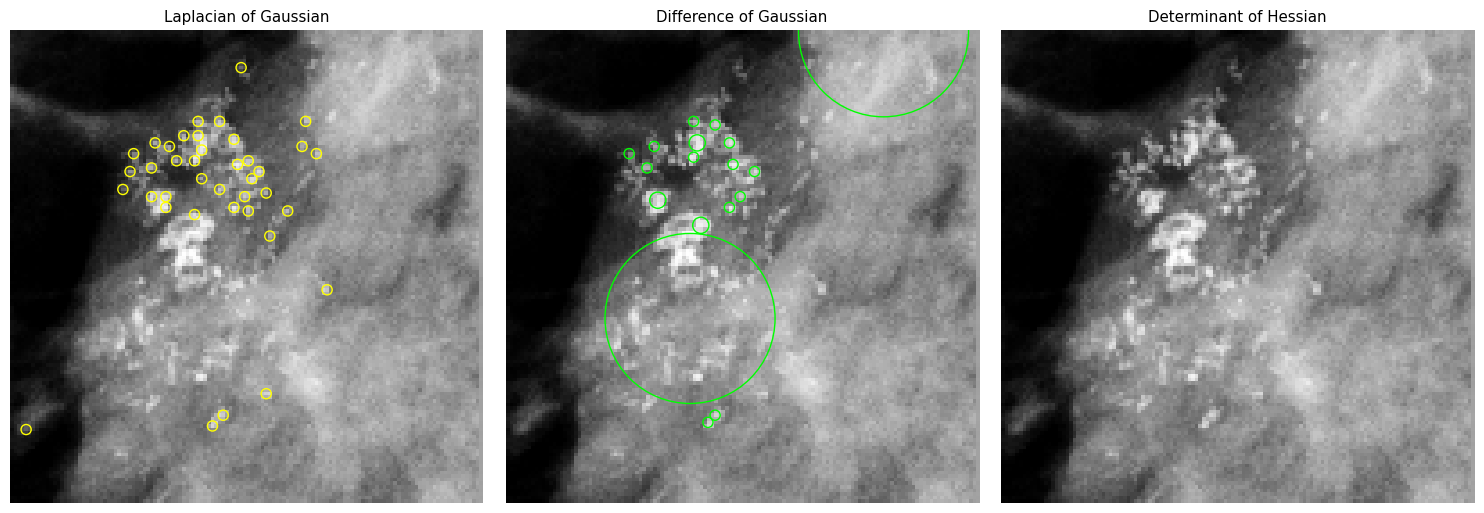

Parametros: Num_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
4
el blob es: 0
el blob es: 1
el blob es: 2


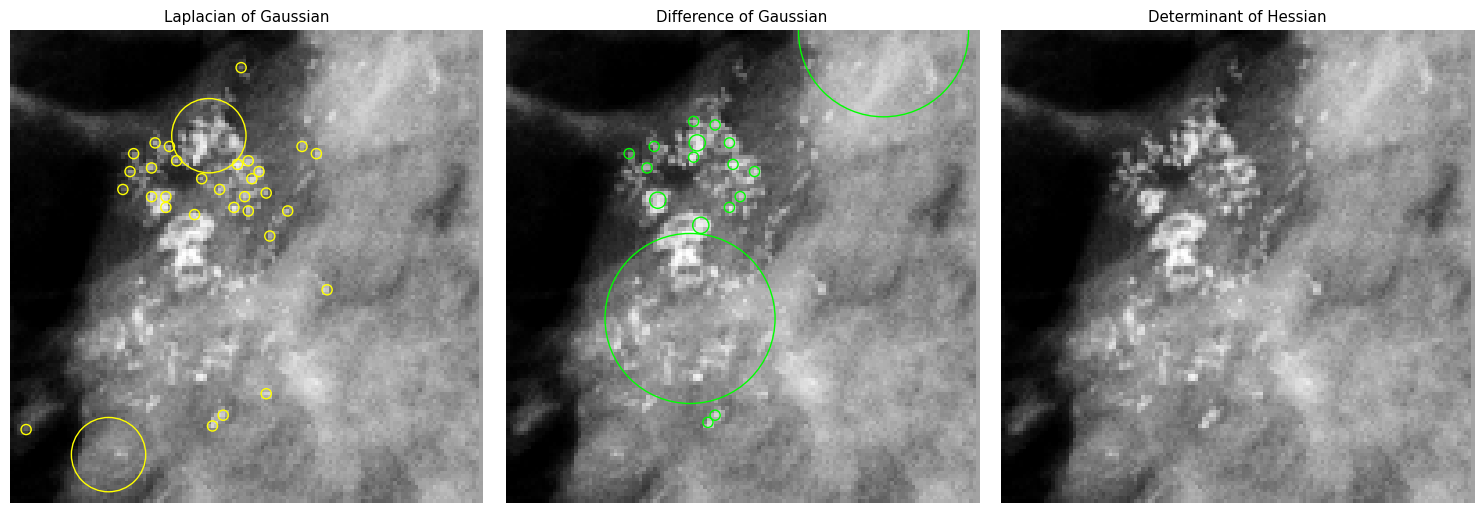

Parametros: Num_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
8
el blob es: 0
el blob es: 1
el blob es: 2


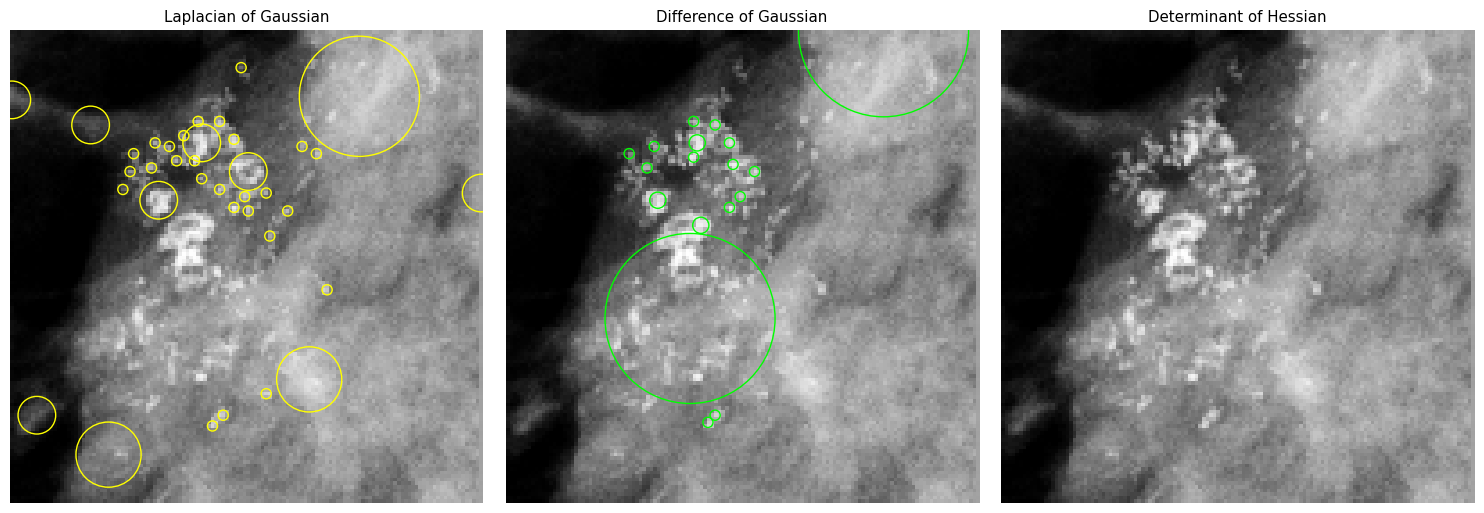

Parametros: Num_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
10
el blob es: 0
el blob es: 1
el blob es: 2


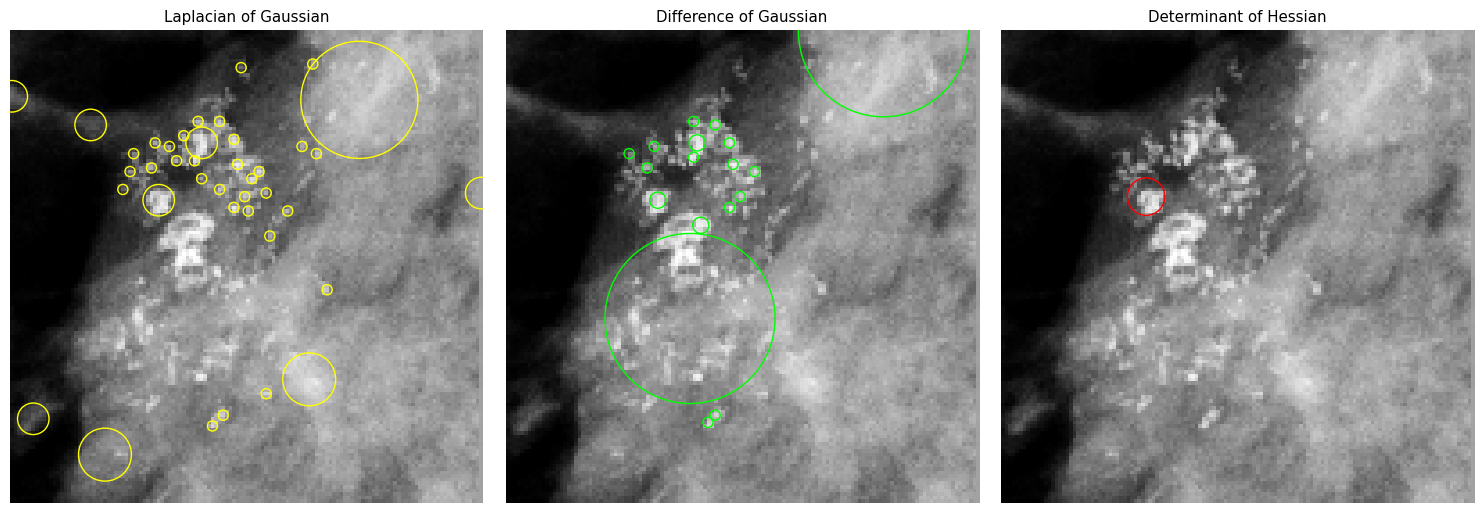

Parametros: Num_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian
11
el blob es: 0
el blob es: 1
el blob es: 2


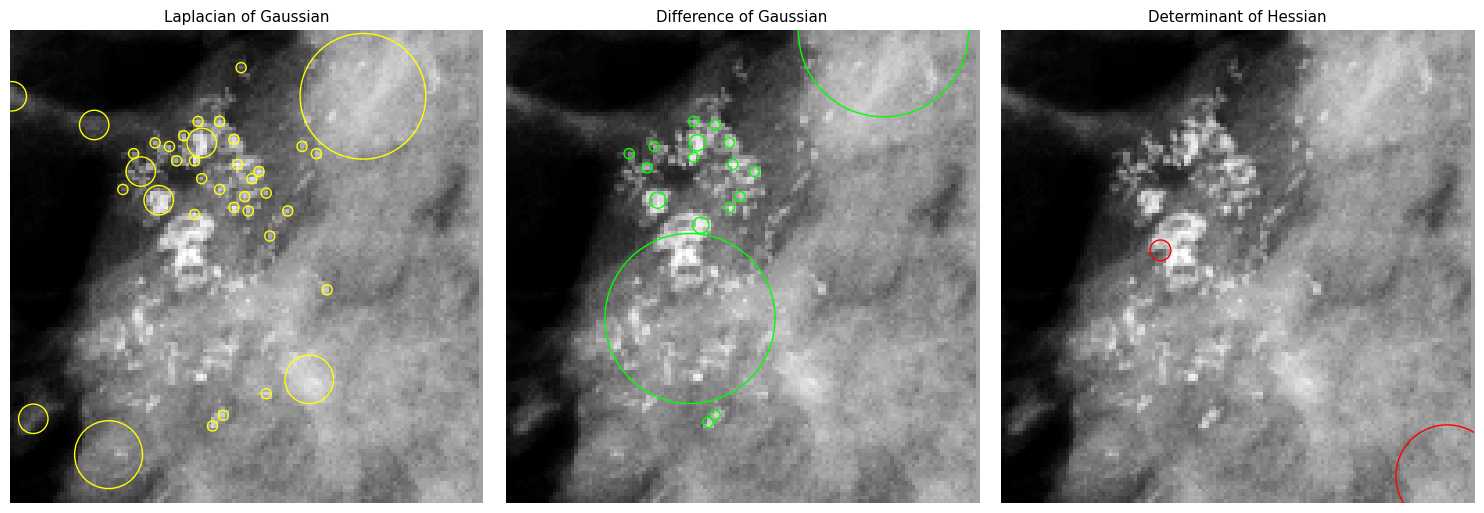

num_sigma = 1
Blobs encontrados por blobs_log: 708
Blobs encontrados por blobs_dog: 244
Blobs encontrados por blobs_doh: 0
num_sigma = 2
Blobs encontrados por blobs_log: 399
Blobs encontrados por blobs_dog: 244
Blobs encontrados por blobs_doh: 0
num_sigma = 4
Blobs encontrados por blobs_log: 357
Blobs encontrados por blobs_dog: 244
Blobs encontrados por blobs_doh: 0
num_sigma = 8
Blobs encontrados por blobs_log: 361
Blobs encontrados por blobs_dog: 244
Blobs encontrados por blobs_doh: 0
num_sigma = 10
Blobs encontrados por blobs_log: 326
Blobs encontrados por blobs_dog: 244
Blobs encontrados por blobs_doh: 1
num_sigma = 11
Blobs encontrados por blobs_log: 309
Blobs encontrados por blobs_dog: 244
Blobs encontrados por blobs_doh: 2


In [ ]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

image = recorte_209_rgb
image_gray =  rgb2gray(image)

num_sigma=[1,2,4,8,10,11]

for l in num_sigma:
    blobs_log = blob_log(image_gray, min_sigma=1, max_sigma=20, num_sigma=l, threshold=0.1)
    # Compute radii in the 3rd column.
    print("Parametros: Num_sigma. FILTRO BLOBS_LOG. Laplacian of Gaussian")
    blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

    blobs_dog = blob_dog(image_gray,min_sigma=1, max_sigma=20 , threshold=0.1)
    blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

    blobs_doh = blob_doh(image_gray, min_sigma=1, max_sigma=20, num_sigma=l, threshold=0.01)

    blobs_list = [blobs_log, blobs_dog, blobs_doh]
    colors = ['yellow', 'lime', 'red']
    titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
              'Determinant of Hessian']
    sequence = zip(blobs_list, colors, titles)
    print(l)

    #fig,axes = plt.subplots(1,2, figsize=(15, 3), sharex=True, sharey=True)
    #ax = axes.ravel()

    fig, axes = plt.subplots( 1,3,figsize=(15, 5))
    ax = axes.ravel()

    for idx, (blobs, color, title) in enumerate(sequence):
        print("el blob es:", idx)
        axes[idx].set_title(title)
        axes[idx].imshow(image_gray, cmap="gray")
        for blob in blobs:
            y, x, r = blob
            if 1 <= r <= 25:  # Agregar la condición para r
            #print("el radio es:", r)
                c = plt.Circle((x, y), r, color=color, linewidth=1, fill=False)
                ax[idx].add_patch(c)
        ax[idx].set_axis_off()

    #graficar_imagen(recorte_209_rgb, 'img_rgb', tamaño=60)

    plt.tight_layout()
    plt.show()

##############
for l1 in num_sigma:
    blobs_log = blob_log(image_gray, min_sigma=1, max_sigma=20, num_sigma=l1, threshold=0.01)
    blobs_dog = blob_dog(image_gray, min_sigma=1, max_sigma=20, threshold=0.01)
    blobs_doh = blob_doh(image_gray, min_sigma=1, max_sigma=20, num_sigma=l1, threshold=0.01)

    print(f"num_sigma = {l1}")
    print(f"Blobs encontrados por blobs_log: {len(blobs_log)}")
    print(f"Blobs encontrados por blobs_dog: {len(blobs_dog)}")
    print(f"Blobs encontrados por blobs_doh: {len(blobs_doh)}")

* SELECCIONO LAS ZONAS DONDE VOY A DETERMINAR LA DIMENSIÓN FRACTAL

Gardo la imagen en con el mejor filtro de detección, en este caso LAPLACIAN OF GAUSSIAN, y los mejores parametros para estas imagenes num_sigma:10, max_sigma:10